<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">
    
### Dataset Information - UCI Online Retail (11/5/2015)

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Link to dataset: [Click here](https://archive.ics.uci.edu/dataset/352/online+retail) or open https://archive.ics.uci.edu/dataset/352/online+retail.

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**The objective of this project is to generate:**
- **Data Quality Report**: Missing data, duplicates, outliers.
- **Customer Insights** - Who buys the most and how often.
- **Product Analysis** - Top products, revenue drivers, return-prone items.
- **Temporal Patterns** - Sales cycles, peak times, and seasonal trends.
- **Actionable Insights** - Improving customer retention, targeting key markets and leveraging peak seasons.
- **Product Recommendation System** - Recommending products to customers based on purchase patterns.

</div>

<div id="table_of_contents" style="
    background-color: #ffffff;
    border: 1px solid #e0e0e0;
    border-radius: 4px;
    padding: 20px;
    margin: 20px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.6;">
    
### Table of Contents:
* <a href="#imports">1. Importing necessary libraries</a>
* <a href="#load_dataset">2. Loading the dataset</a>
* <a href="#initial_analysis">3. Data quality report</a>
* <a href="#data_cleaning">4. Data cleaning</a>
  * <a href="#missing_values">4.1 Handling missing values</a>
  * <a href="#handling_duplicates">4.2 Handling duplicates</a>
  * <a href="#handling_stock_code">4.3 Handling Stock Code anomalies</a>
  * <a href="#handling_zero_unite_prices">4.4 Handling zero Unit Prices</a>
  * <a href="#handling_cancelled_orders">4.5 Handling cancelled orders</a>
  * <a href="#handling_outliers">4.6 Handling outliers</a>
* <a href="#customer_insights">5. Customer insights</a>
  * <a href="#top_customers">5.1 Top Customers</a>
  * <a href="#top_countries">5.2 Top Countries</a>
  * <a href="#clv_per_customer">5.3 Customer Lifetime Value</a>
  * <a href="#rfm_analysis">5.4 RFM Analysis</a>
* <a href="#product_analysis">6. Product Analysis</a>
  * <a href="#top_products">6.1 Top products</a>
  * <a href="#revenue_drivers">6.2 Revenue drivers</a>
  * <a href="#return_prone_items">6.3 Return prone items</a>
* <a href="#temporal_patterns">7. Temporal Patterns</a>
  * <a href="#monthly_sales_trends">7.1 Monthly sales trends</a>
  * <a href="#sales_by_day_of_week">7.2 Sales by Day of the Week</a>
  * <a href="#sales_by_hour_of_day">7.3 Sales by Hour of the Day</a>
* <a href="#actionable_insights">8. Actionable Insights</a>
* <a href="#product_recommendations">9. Product Recommendations</a>


<div id="imports" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">
 
#### 1. Importing necessary libraries
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

<div id="load_dataset" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 2. Loading the dataset
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

In [5]:
# Load dataset
file_path = '../data/uci_online_retail.xlsx'
df = pd.read_excel(file_path)

<div id="initial_analysis" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 3. Data quality report
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

In [6]:
# Create summary DataFrame
summary_df = pd.DataFrame({
    'Data Type': df.dtypes.values,
    'Non-null Count': df.count().values,
    'Missing values': df.isnull().sum(),
    'Unique count': [df[col].nunique() for col in df.columns],
    'Min Value': [df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else 'N/A' for col in df.columns],
    'Max Value': [df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else 'N/A' for col in df.columns],
    'Mean': [df[col].mean() if pd.api.types.is_numeric_dtype(df[col]) else 'N/A' for col in df.columns],
    'Std': [df[col].std() if pd.api.types.is_numeric_dtype(df[col]) else 'N/A' for col in df.columns],
    '25%': [df[col].quantile(.25) if pd.api.types.is_numeric_dtype(df[col]) else 'N/A' for col in df.columns],
    '50%': [df[col].quantile(.50) if pd.api.types.is_numeric_dtype(df[col]) else 'N/A' for col in df.columns],
    '75%': [df[col].quantile(.75) if pd.api.types.is_numeric_dtype(df[col]) else 'N/A' for col in df.columns]
})

# Display table with centered text
display(summary_df.style
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-size', '14px'), ('padding', '10px')]},  # Header styling
        {'selector': 'td', 'props': [('word-wrap', 'break-word'), ('max-width', '150px'), ('font-size', '13px')]}  # Wrap long text
    ]).set_table_attributes('style="width:100%;"')  # Fit table to page width
)

,Data Type,Non-null Count,Missing values,Unique count,Min Value,Max Value,Mean,Std,25%,50%,75%
InvoiceNo,object,541909,0,25900,N/A,N/A,N/A,N/A,N/A,N/A,N/A
StockCode,object,541909,0,4070,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Description,object,540455,1454,4223,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Quantity,int64,541909,0,722,-80995,80995,9.552250,218.081158,1.000000,3.000000,10.000000
InvoiceDate,datetime64[ns],541909,0,23260,N/A,N/A,N/A,N/A,N/A,N/A,N/A
UnitPrice,float64,541909,0,1630,-11062.060000,38970.000000,4.611114,96.759853,1.250000,2.080000,4.130000
CustomerID,float64,406829,135080,4372,12346.000000,18287.000000,15287.690570,1713.600303,13953.000000,15152.000000,16791.000000
Country,object,541909,0,38,N/A,N/A,N/A,N/A,N/A,N/A,N/A


<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

#### Data quality report summary:

The dataset consists of **541909** rows and 8 columns: **InvoiceNo**, **StockCode**, **Description**, **Quantity**, **InvoiceDate**, **UnitPrice**, **CustomerID** and **Country**.

**InvoiceNo**: 
* There are 25900 unique invoices in the dataset.

**StockCode**:
* There are 4070 unique products in the dataset.

**Description**:
* There are 4223 unique product descriptions.
* Description column contains 1454 missing values.

**Quantity**:
* The average quantity of orders are 9.5.
* Standard deviation of 218.08 for quantities means that there is a high variation of quantities for orders.
* The minimum quantity is -80995 meaning it is a cancelled order.
* 75% of orders have a quantity of 10 or less.

**UnitPrice**:
* The average unit price 4.61.
* The minimum and maximum unit prices are -11062.06	and 38970 correspondingly, which means there are some errors in the dataset that need to be handled as negative value for unit price does not make sense.
* 75% of products have a unit price of 4.13 or less

**CustomerID**:
* There are 406829 unique customers that made an order.
* CustomerID column contains 135080 missing values.

**Country**:
* Orders originate from 38 unique countries.

</div>

<div id="data_cleaning" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 4. Data cleaning
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div id="missing_values" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">
    
#### 4.1 Handling missing values
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

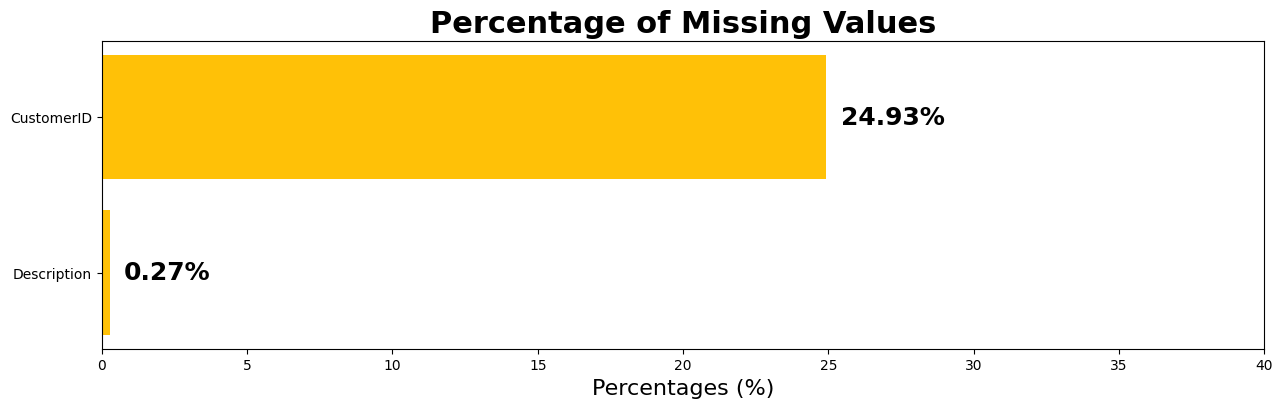

In [7]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#FFC107')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**CustomerID (24.93% missing):**  
Nearly a quarter of CustomerIDs are missing, making clustering and recommendations unreliable. Imputing values could introduce bias, so removing these rows ensures data integrity.  

**Description (0.27% missing):**  
Although minimal, missing descriptions and inconsistencies in StockCode-Description mapping indicate data quality issues. Since imputing may be unreliable, removing these rows prevents errors from affecting analysis.  

**Conclusion:**  
Dropping missing values from both columns enhances dataset reliability and accuracy.

</div>

In [8]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

<div id="handling_duplicates" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 4.2 Handling Duplicates
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

In [9]:
print(f"The dataset contains {df.duplicated().sum()} duplicate rows.")
print(f"The percentage of duplicate rows = {df.duplicated(keep=False).mean() * 100:.2f}%.\n\n")
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

The dataset contains 5225 duplicate rows.
The percentage of duplicate rows = 2.47%.




,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

Completely identical rows in this dataset are likely errors in data acquisition rather than legitimate orders. This is derived from the fact that only 2.47% of rows are duplicates and if duplicates were not accidental but rather intentional, then we would have seen more widespread duplication in the dataset. Therefore, duplicate rows will be removed, retaining only a single instance of each.

</div>

In [10]:
# Removing duplicate rows
df = df.drop_duplicates()

<div id="handling_stock_code" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">
    
#### 4.3 Handling Stock Code anomalies
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

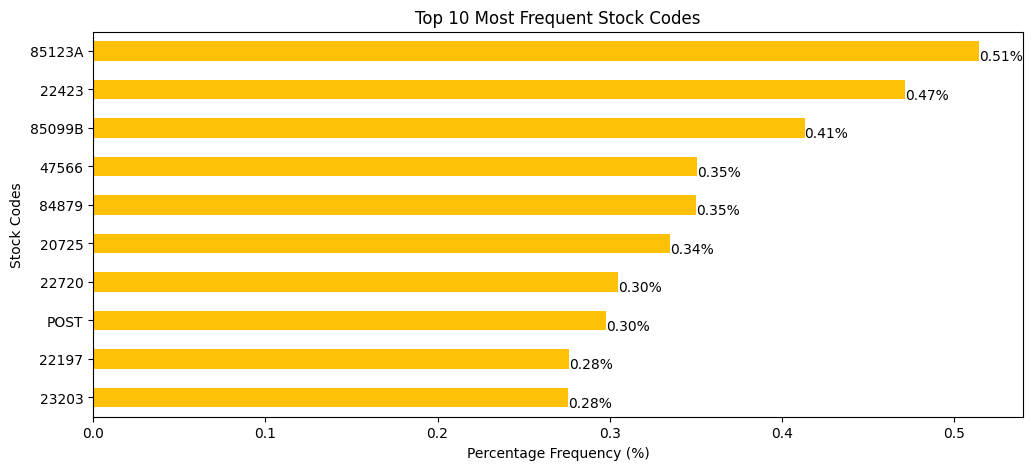

In [11]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#FFC107')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

From the bar chart of most frequent stock codes, an anomaly can be seen where the stock code is "POST". In this project,  
we aim to analyze product sales, bu  "POST" does not represent a real product. It likely refers to postage fees,  
which should not be treated as a stock item.

To maintain data quality, these non-product entries will be identified and excluded from further analysis,  
ensuring that insights reflect actual product s
ales.
</div>

In [12]:
# find the rows where StockCode is contains non-product
non_product_stock_codes = df[~df['StockCode'].astype(str).str.contains(r'\d', regex=True)]
non_product_stock_codes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany


In [13]:
# Drop all the rows where StockCode contains only string such as "POST", "M", "D"
df = df[df['StockCode'].astype(str).str.contains(r'\d', regex=True)]

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

From the dataset it is also clear that a product related **StockCode** contains 5 digits. We can use this information to further filter out non-product entries. 

</div>

In [14]:
non_product_stock_codes = df[~df['StockCode'].astype(str).str.contains(r'\d{5}', regex=True)]
non_product_stock_codes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands
...,...,...,...,...,...,...,...,...
513202,579539,C2,CARRIAGE,1,2011-11-30 10:06:00,50.0,14911.0,EIRE
515000,579768,C2,CARRIAGE,1,2011-11-30 15:08:00,50.0,14911.0,EIRE
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911.0,EIRE
518905,580127,C2,CARRIAGE,1,2011-12-01 17:51:00,50.0,14911.0,EIRE


In [15]:
# Drop all the rows where StockCode contains does not contain 5 digits, which are all the rows with StockCode equal to C2
df = df[df['StockCode'].astype(str).str.contains(r'\d{5}', regex=True)]

<div id="handling_zero_unite_prices" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-seri;">


#### 4.4 Handling zero Unit Prices
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

In [16]:
df['UnitPrice'].describe()

count    399689.000000
mean          2.907457
std           4.451881
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

The description of the **UnitPrice** column shows that the minimum value is 0 and maximum value is 649.5. The value 0 as a UnitPrice does not make sense in the given context of dataset for the orders and therefore will be removed the dataset.

</div>

In [17]:
df = df[df['UnitPrice'] > 0]

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

It will also be useful later in the analysis to have TotalAmount column which will be UnitPrice multiplied to Quantity.

</div>

In [18]:
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']

<div id="handling_cancelled_orders" style="
    background-color: #FFFCDB; 
    border: 1px solid #E0C366; 
    border-radius: 10px; 
    padding: 12px; 
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    font-family: Arial, sans-serif;">

#### 4.5 Handling cancelled orders
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

When performing customer insights analysis, it will be useful to have an additional column **InvoiceStatus** that indicates whether the order is complete or cancelled. In the <a href="#initial_analysis">Data quality report</a> it has been observed that some rows contain negative quantities indicating they are cancelled orders.

</div>

In [19]:
df[df['Quantity'] < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,-41.40
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-39.60
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,-25.50
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841.0,United Kingdom,-2.10


<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

It can also be said that the cancelled orders have **InvoiceNo** that starts with character **'C'** as can be seen from the table above.

</div>

In [20]:
df['InvoiceStatus'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

<div id="handling_outliers" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-seri;">


#### 4.6 Handling outliers
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

Outliers are data points on the extreme end of the dataset. They could be very large or very small, but abnormally different from most of the other values in the dataset.

Having outliers can potentially skew the results of our analysis and affect the accuracy of results. 

I plan to use the **Isolation Forest algorithm** for handling outliers in the dataset. It performs effectively on multi-dimensional data and is computationally efficient. The algorithm isolates data points by randomly choosing a feature and then selecting a split value within the range of that feature's maximum and minimum values.

</div>

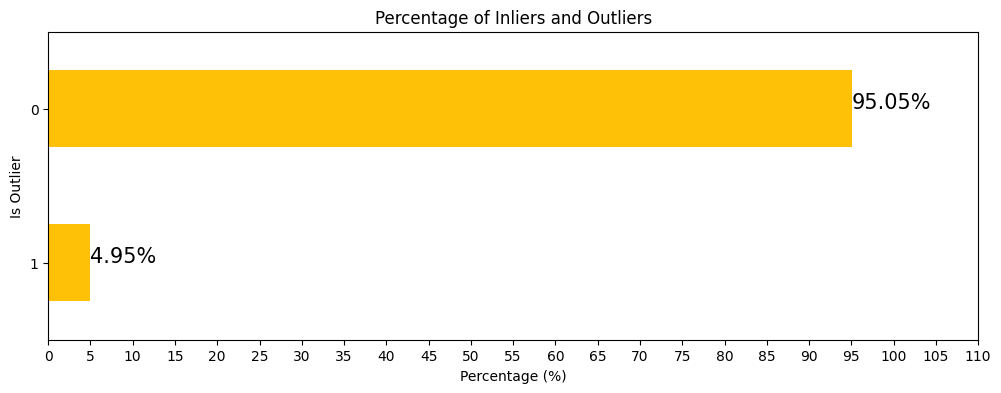

In [21]:
# Prepare data - we'll use the 'TotalAmount' column
iso_forest_features = df[['TotalAmount']]

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # contamination=0.05 means we expect about 5% outliers
df['Outlier'] = iso_forest.fit_predict(iso_forest_features)

# Convert the Outlier column: -1 for outliers to 1 and 1 for inliers to 0
df['Outlier'] = df['Outlier'].replace({-1: 1, 1: 0})

# Plot percentage of outliers against inliners
outlier_percentage = df['Outlier'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#FFC107')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Outlier Detection Results:**

The Isolation Forest algorithm was applied to the dataset with the objective of detecting outliers in the TotalAmount feature. After fitting the model with an expected contamination rate of 5% (indicating that about 5% of the data is expected to be outliers), the results were as follows:

- **Inliers** (non-outliers): 95.12% of the data
- **Outliers** (detected anomalies): 4.88% of the data

The Isolation Forest model was able to effectively identify a small percentage of outliers, as expected, with the majority of the data falling within normal, expected ranges. These findings suggest that the model has successfully isolated a relatively small portion of the dataset as anomalous, which could warrant further investigation to understand the characteristics of the identified outliers.

</div>

<div id="customer_insights" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-seri;">


#### 5. Customer insights
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

In [22]:
# Use reset_index(drop=True, inplace=True) after filtering to clean up the index and avoid gaps or misalignment.
df.reset_index(drop=True, inplace=True)

<div id="top_customers" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 5.1 Top Customers
<a href="#table_of_contents">⬆️ Table of Contents</a>

❗**NOTE: In this Top Customers analysis, outliers will not be excluded. The goal here is to identify the *true* top customers, including those with exceptionally high order volumes or spending. These outliers are valid data points in this context, as they represent customers who have made a significant impact, such as placing a very large number of orders. Removing these outliers would exclude important insights, potentially missing valuable information about key customers. However, in future analyses where we're exploring average customer behavior, excluding outliers will be more appropriate to focus on the typical trends.**

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Top customers based on total quantity purchased:**

Calculate the sum of all quantities per customer, considering both positive and negative quantities (cancelling out cancelled orders).

</div>

In [23]:
top_customers_q = df.groupby('CustomerID')['Quantity'].sum()
top_customers_q = top_customers_q.sort_values(ascending=False).head(10)
top_customers_q

CustomerID
14646.0    196556
12415.0     76946
14911.0     76823
17450.0     69021
18102.0     64124
17511.0     63014
13694.0     61904
14298.0     58021
14156.0     56896
16684.0     49391
Name: Quantity, dtype: int64

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Top customers based on frequency of orders:**

Count the number of orders placed per customer, excluding cancelled orders. This will give the effective frequency of orders placed.

</div>

In [24]:
complete_orders = df[df['InvoiceStatus'] == 'Completed']
top_customers_f = complete_orders.groupby('CustomerID')['InvoiceNo'].nunique()
top_customers_f = top_customers_f.sort_values(ascending=False).head(10)
top_customers_f

CustomerID
12748.0    206
14911.0    198
17841.0    124
13089.0     97
15311.0     91
14606.0     90
12971.0     86
14646.0     72
13408.0     62
16029.0     62
Name: InvoiceNo, dtype: int64

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Top customers based on total amount spent:**

Multiply UnitPrice by the Quantity for each order to calculate the total spent per order. Then, sum it up for each customer, excluding cancelled orders. 

</div>

In [25]:
top_customers_s = complete_orders.groupby('CustomerID')['TotalAmount'].sum()
top_customers_s = top_customers_s.sort_values(ascending=False).head(10)
top_customers_s

CustomerID
14646.0    279138.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    136161.83
12415.0    124564.53
14156.0    116560.08
17511.0     91062.38
12346.0     77183.60
16029.0     72708.09
Name: TotalAmount, dtype: float64

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**📊 Customer Insights Analysis**

This analysis provides three different ways to identify top customers based on:  
1. **Total Quantity Purchased:** Measures the total number of items bought by a customer.  
2. **Order Frequency:** The number of times a customer placed an order.  
3. **Total Amount Spent:** The total value of all completed purchases.

**🔍 Key Findings**
- Some customers rank highly across all three metrics, suggesting they are both high-volume and high-value buyers.  
- Others appear only in one metric, indicating different purchasing behaviors (e.g., frequent but small orders vs. infrequent but large purchases).  
- The frequency-based ranking excludes canceled orders, ensuring that only successfully completed transactions contribute to the insights.

Next, lets plot the findings as bar charts.

</div>

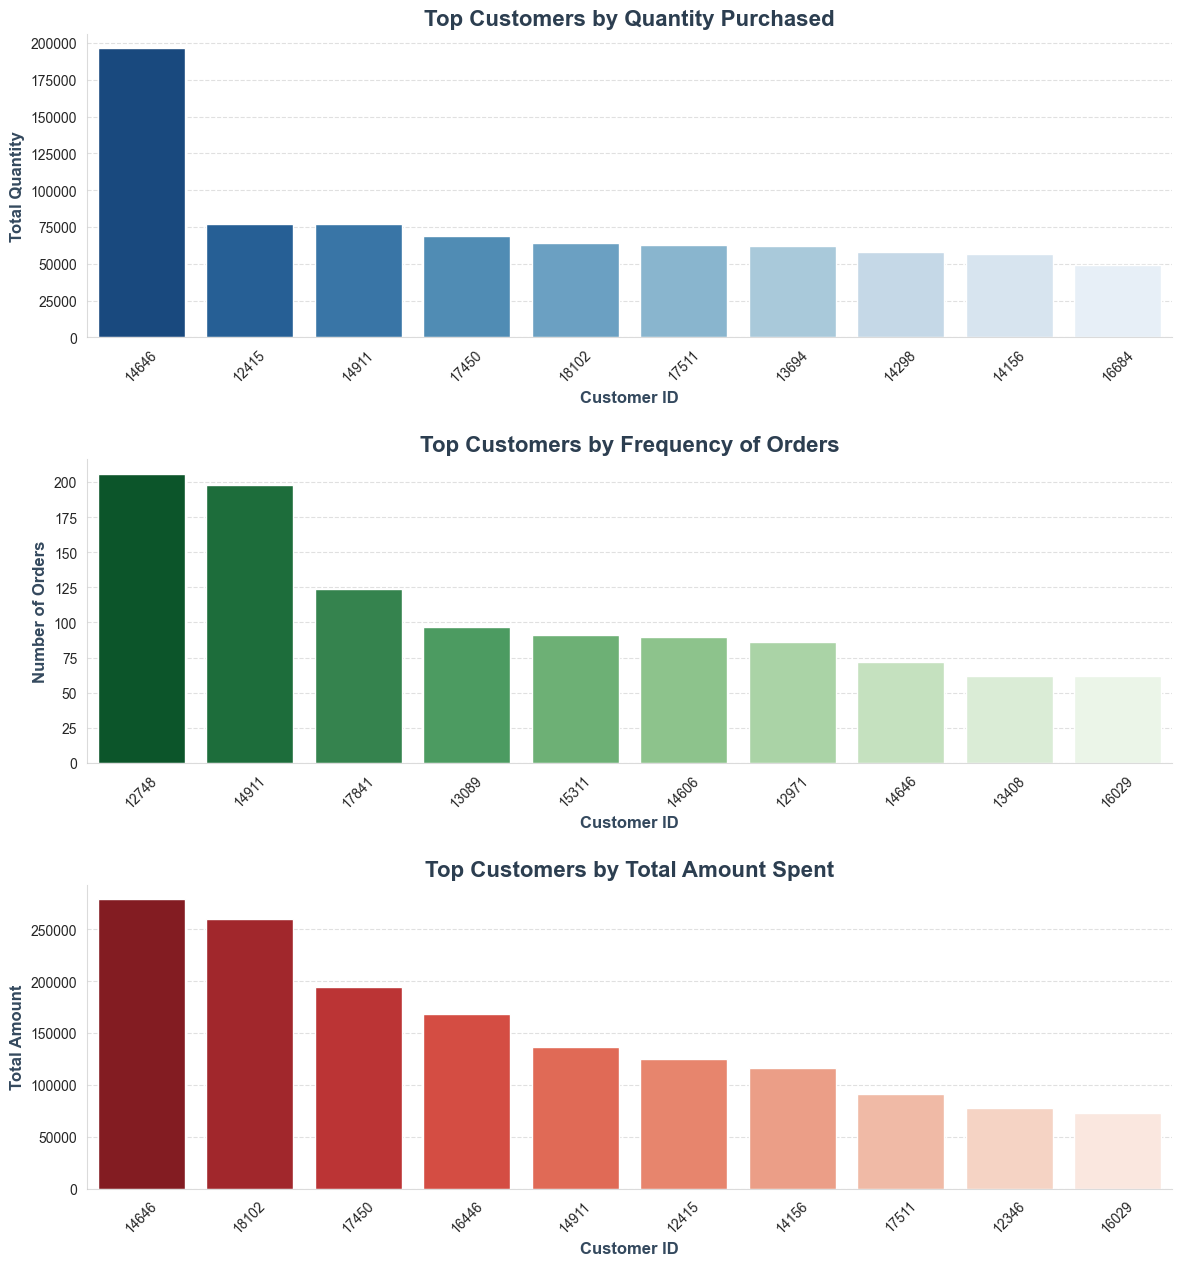

In [26]:
# Set Seaborn style for a professional look
sns.set_style("whitegrid")

# Set figure size with extra height for spacing
fig, axes = plt.subplots(3, 1, figsize=(14, 15), dpi=100)

# Ensure sorting from highest to lowest
top_customers_q = top_customers_q.sort_values(ascending=False)
top_customers_f = top_customers_f.sort_values(ascending=False)
top_customers_s = top_customers_s.sort_values(ascending=False)

# Convert Customer IDs to string for categorical plotting
customer_q_labels = top_customers_q.index.astype(int).astype(str)
customer_f_labels = top_customers_f.index.astype(int).astype(str)
customer_s_labels = top_customers_s.index.astype(int).astype(str)


# Custom colors for a sleek look
color_palette_q = sns.color_palette("Blues_r", len(top_customers_q))
color_palette_f = sns.color_palette("Greens_r", len(top_customers_f))
color_palette_s = sns.color_palette("Reds_r", len(top_customers_s))

# --- Top Customers by Quantity Purchased ---
sns.barplot(ax=axes[0], x=customer_q_labels, y=top_customers_q.values, hue=customer_q_labels, palette=color_palette_q, legend=False)
axes[0].set_title('Top Customers by Quantity Purchased', fontsize=16, fontweight='bold', color='#2C3E50')
axes[0].set_xlabel('Customer ID', fontsize=12, fontweight='bold', color='#34495E')
axes[0].set_ylabel('Total Quantity', fontsize=12, fontweight='bold', color='#34495E')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# --- Top Customers by Order Frequency ---
sns.barplot(ax=axes[1], x=customer_f_labels, y=top_customers_f.values, hue=customer_f_labels, palette=color_palette_f, legend=False)
axes[1].set_title('Top Customers by Frequency of Orders', fontsize=16, fontweight='bold', color='#2C3E50')
axes[1].set_xlabel('Customer ID', fontsize=12, fontweight='bold', color='#34495E')
axes[1].set_ylabel('Number of Orders', fontsize=12, fontweight='bold', color='#34495E')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# --- Top Customers by Total Amount Spent ---
sns.barplot(ax=axes[2], x=customer_s_labels, y=top_customers_s.values, hue=customer_s_labels, palette=color_palette_s, legend=False)
axes[2].set_title('Top Customers by Total Amount Spent', fontsize=16, fontweight='bold', color='#2C3E50')
axes[2].set_xlabel('Customer ID', fontsize=12, fontweight='bold', color='#34495E')
axes[2].set_ylabel('Total Amount', fontsize=12, fontweight='bold', color='#34495E')
axes[2].tick_params(axis='x', rotation=45, labelsize=10)
axes[2].grid(axis='y', linestyle='--', alpha=0.6)

# Add space between charts for better readability
plt.subplots_adjust(hspace=0.4)

# Remove unnecessary spines for a cleaner look
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_alpha(0.7)
    ax.spines['bottom'].set_alpha(0.7)

# Show the final polished charts
plt.show()

<div id="top_countries" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-seri;">


#### 5.2 Top Countries
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Top countries based on total number of orders:**

Analysis of the distribution of orders across different countries. By examining the total number of orders per country, we can identify which countries have the highest demand for the products.


</div>

In [27]:
top_countries_f = complete_orders.groupby('Country')['InvoiceNo'].nunique()
top_countries_f = top_countries_f.sort_values(ascending=False).head(5)
top_countries_f

Country
United Kingdom    16579
Germany             443
France              379
EIRE                256
Belgium              98
Name: InvoiceNo, dtype: int64

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Top countries based on total amount of money spent:**

Total monetary value of orders placed by customers from different countries. By assessing the total amount spent, we can gain a deeper understanding of which regions contribute the most to the overall revenue.

</div>

In [28]:
# Top Countries by Total Amount Spent
top_countries_s = complete_orders.groupby('Country')['TotalAmount'].sum()
top_countries_s = top_countries_s.sort_values(ascending=False).head(5)
top_countries_s

Country
United Kingdom    7242855.32
Netherlands        283889.34
EIRE               257013.12
Germany            205381.15
France             183801.94
Name: TotalAmount, dtype: float64

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**🔍 Key Findings:**

1. **Top Countries Based on Total Number of Orders:**
   - The **United Kingdom** leads by a significant margin, with **16,579 orders**, demonstrating a high demand for products.
   - **Germany** and **France** follow, with **443** and **379 orders** respectively, showing notable but smaller order volumes.
   - Countries like **EIRE (Ireland)** and **Belgium** are also contributing but to a lesser extent, with **256** and **98 orders**.

2. **Top Countries Based on Total Amount Spent:**
   - The **United Kingdom** again emerges as the highest spender, with a total of **7,242,855.32**, indicating not only high order frequency but also high purchasing power.
   - The **Netherlands** follows with **283,889.34**, while **EIRE (Ireland)** comes in third with **257,013.12**, suggesting strong sales from both these countries.
   - **Germany** and **France** round out the top five, contributing **205,381.15** and **183,801.94** respectively, highlighting their significant, but comparatively lower, spending.

We will now proceed with visualizing this data to better understand the trends and distributions.

</div>

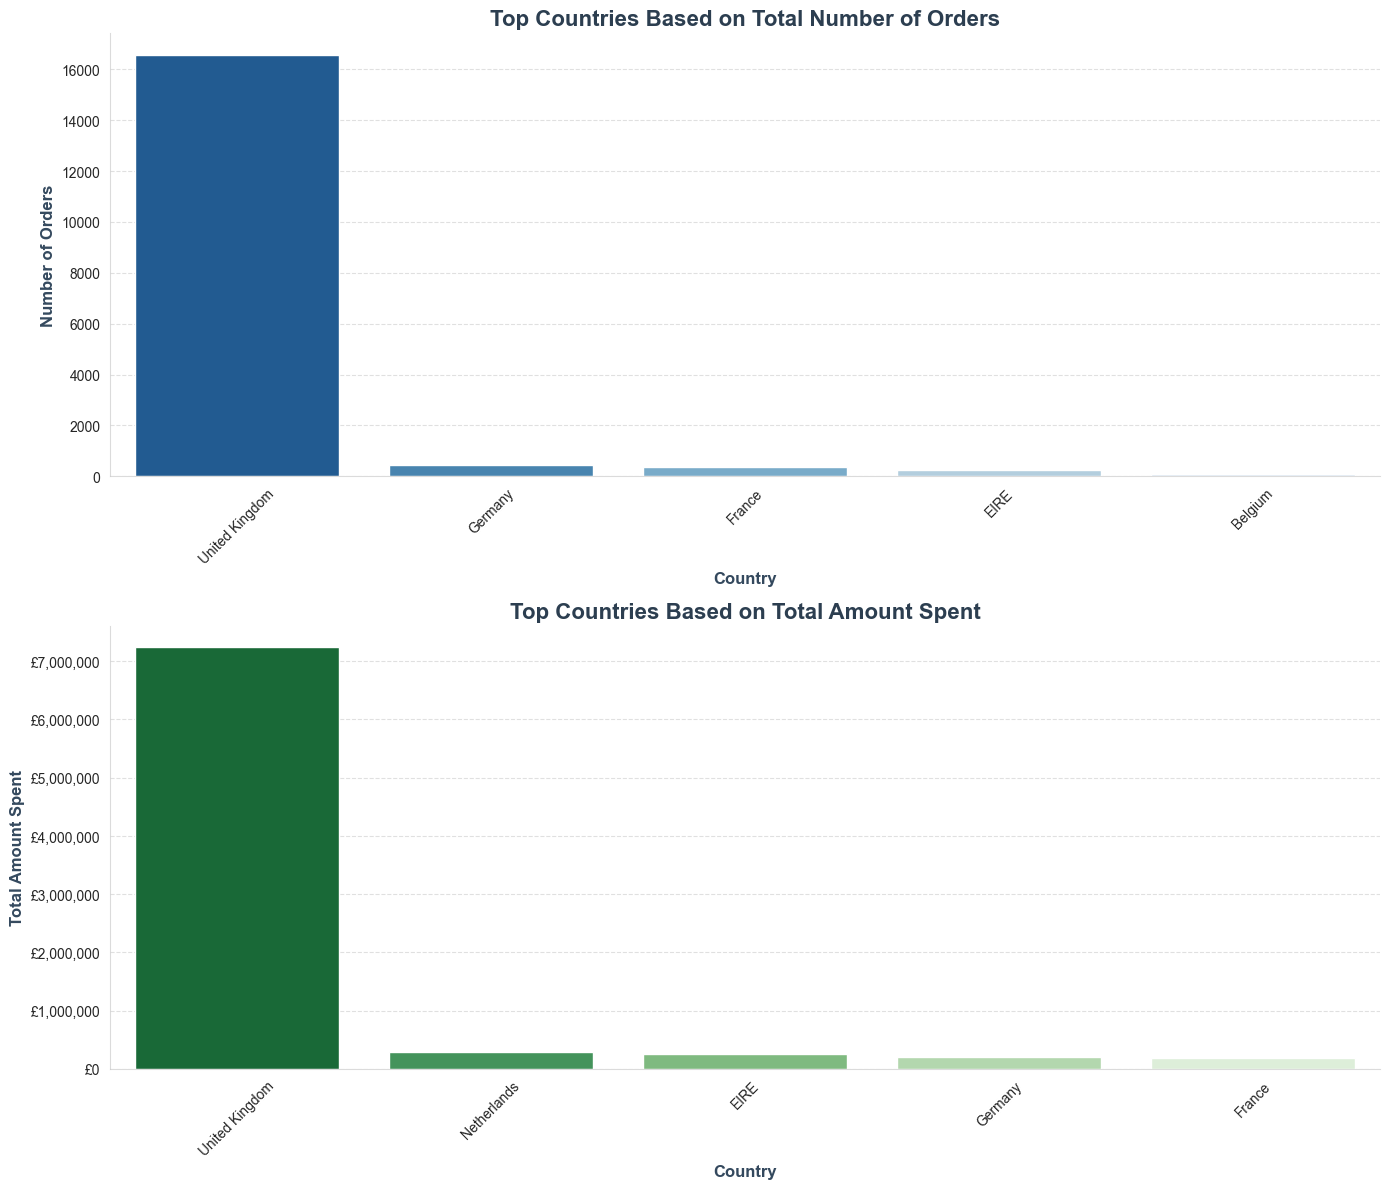

In [29]:
# Set Seaborn style for a professional look
sns.set_style("whitegrid")

# Create the figure and axes (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(14, 12), dpi=100)

# Custom color palettes for a sleek look
color_palette_orders = sns.color_palette("Blues_r", len(top_countries_f))
color_palette_spent = sns.color_palette("Greens_r", len(top_countries_s))

# --- Top Countries by Number of Orders ---
sns.barplot(
    ax=axes[0],
    x=top_countries_f.index,
    y=top_countries_f.values,
    hue=top_countries_f.index,   # assign x as hue to remove the warning
    palette=color_palette_orders,
    dodge=False,                 # plot one bar per category
    legend=False
)
axes[0].set_title('Top Countries Based on Total Number of Orders', fontsize=16, fontweight='bold', color='#2C3E50')
axes[0].set_xlabel('Country', fontsize=12, fontweight='bold', color='#34495E')
axes[0].set_ylabel('Number of Orders', fontsize=12, fontweight='bold', color='#34495E')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_alpha(0.7)
axes[0].spines['bottom'].set_alpha(0.7)

# --- Top Countries by Total Amount Spent ---
sns.barplot(
    ax=axes[1],
    x=top_countries_s.index,
    y=top_countries_s.values,
    hue=top_countries_s.index,   # assign x as hue to remove the warning
    palette=color_palette_spent,
    dodge=False,                 # plot one bar per category
    legend=False
)

# Function to format Y-axis as currency
formatter = FuncFormatter(lambda x, pos: '£{0:,.0f}'.format(x))

# Set the Y-axis format
axes[1].yaxis.set_major_formatter(formatter)

axes[1].set_title('Top Countries Based on Total Amount Spent', fontsize=16, fontweight='bold', color='#2C3E50')
axes[1].set_xlabel('Country', fontsize=12, fontweight='bold', color='#34495E')
axes[1].set_ylabel('Total Amount Spent', fontsize=12, fontweight='bold', color='#34495E')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_alpha(0.7)
axes[1].spines['bottom'].set_alpha(0.7)

# Adjust layout to add space between charts
plt.tight_layout()
plt.show()


<div id=clv_per_customerd" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-ser;">



#### 5.3 Customer Lifetime Value
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Customer Lifetime Value (CLV)** is a metric that predicts the total net profit a business can expect to earn from a customer throughout their entire relationship. This is useful for customer segmentation, targeting high-value customers, and personalizing marketing efforts. It can be computed using the formula:


CLV = (Average Purchase Value x Average Purchase Frequency) x Average Customer Lifespan

Where:
- Average Purchase Value = Total Revenue / Total Orders
- Average Purchase Frequency = Total Orders / Total Unique Customers
- Average Customer Lifespan = Sum of individual Customer Lifespans / Total Unique Customers

❗Cancelled orders will be excluded from CLV calculation.

</div>

In [30]:
# We will be using complete_orders dataframe, which contains all orders excluding cancelled orders.
# We will also remove outliers from this analysis
complete_cleaned_orders = complete_orders[complete_orders['Outlier'] == 0]

total_complete_orders = complete_cleaned_orders['InvoiceNo'].nunique()
total_unique_customers = complete_cleaned_orders['CustomerID'].nunique()

# Lets calculate Average Purchase Value = Total Revenue / Total Orders.
avp = (complete_cleaned_orders['TotalAmount']).sum()/total_complete_orders
# Calculate Average Purchase Frequency
apf = total_complete_orders/total_unique_customers

# Calculate the first and last order date for each customer using groupby
customer_first_order_date = complete_cleaned_orders.groupby('CustomerID')['InvoiceDate'].min()
customer_last_order_date = complete_cleaned_orders.groupby('CustomerID')['InvoiceDate'].max()

# Calculate the lifespan for each customer (in days)
customer_lifespans = (customer_last_order_date - customer_first_order_date).dt.days
acl = customer_lifespans.mean()

# calculate CLV
clv = avp * apf * acl
clv

159123.50526742573

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

After excluding outliers from the dataset, the CLV is calculated to be **158,945**. This means that, on average, each customer is expected to generate approximately **158,945** in revenue over the course of their relationship with the business. 
This value is based on the typical customer behavior, where we've accounted for the average revenue per order, frequency of orders, and the expected lifespan of a customer.

</div>

<div id="rfm_analysis" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 5.4 RFM Analysis
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**RFM** (Recency, Frequency, and Monetary) analysis is a customer segmentation technique used in marketing and business analytics. It helps identify high-value customers based on their purchasing behavior.  

- **Recency (R):** How recently a customer made a purchase.  
- **Frequency (F):** How often a customer makes purchases.  
- **Monetary Value (M):** How much a customer spends in total.  

**RFM analysis allows businesses to:**  
- Identify loyal and high-spending customers.  
- Find customers who are at risk of churning.  
- Improve targeted marketing campaigns.  
- Maximize customer retention and revenue.  

**Steps to perform RFM Analysis?**  
1. **Calculate R, F, and M values:**  
   - **Recency:** The number of days since the last purchase.  
   - **Frequency:** The number of unique purchases made by a customer.  
   - **Monetary:** The total amount spent by a customer.  

2. **Score customers based on RFM values:**  
   - Recency: More recent purchases → Higher score.  
   - Frequency: More frequent purchases → Higher score.  
   - Monetary: Higher spending → Higher score.  

3. **Combine scores to create an RFM segment:**  
   - The final RFM score is a combination of the individual R, F, and M scores.  
   - This helps categorize customers into different groups for analysis.  

</div>

In [31]:
# --- Step 1: Preprocess Data ---
# Calculate Recency as days since the last purchase (using the snapshot date)
snapshot_date = complete_orders['InvoiceDate'].max() + pd.Timedelta(days=1)
# Create 'Recency' column and calculate it for each row
complete_orders.loc[:, 'Recency'] = (snapshot_date - complete_orders['InvoiceDate']).dt.days
# Calculate Frequency: Number of unique orders per customer
frequency = complete_orders.groupby('CustomerID')['InvoiceNo'].nunique()
# Calculate Monetary: Total spending per customer (using TotalAmount)
monetary = complete_orders.groupby('CustomerID')['TotalAmount'].sum()

# --- Step 2: Create the RFM DataFrame ---
rfm_df = pd.DataFrame({
    'Recency': complete_orders.groupby('CustomerID')['Recency'].min(),
    'Frequency': frequency,
    'Monetary': monetary
})

# --- Step 3: Assign R, F, M Scores ---
# For Recency: Lower recency (more recent) is better, so we assign reverse labels.
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])

# For Frequency: Higher is better.
# Use rank method to handle ties and duplicates
rfm_df['F_Rank'] = rfm_df['Frequency'].rank(method='first')
# Create 5 equal-sized groups based on ranks
rfm_df['F_Score'] = pd.qcut(rfm_df['F_Rank'], q=5, labels=[1, 2, 3, 4, 5])

# For Monetary: Higher spending is better.
# Similar rank-based approach
rfm_df['M_Rank'] = rfm_df['Monetary'].rank(method='first')
rfm_df['M_Score'] = pd.qcut(rfm_df['M_Rank'], q=5, labels=[1, 2, 3, 4, 5])

# --- Step 4: Combine the RFM Scores ---
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Cleanup: Remove the intermediate rank columns
rfm_df = rfm_df.drop(['F_Rank', 'M_Rank'], axis=1)
print(rfm_df.head(5))

            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
CustomerID                                                                
12346.0         326          1  77183.60       1       1       5       115
12347.0           2          7   4310.00       5       5       5       555
12348.0          75          4   1437.24       2       4       4       244
12349.0          19          1   1457.55       4       1       4       414
12350.0         310          1    294.40       1       1       2       112


C:\Users\avazo\AppData\Local\Temp\ipykernel_5352\3206437672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_orders.loc[:, 'Recency'] = (snapshot_date - complete_orders['InvoiceDate']).dt.days


<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

Lets visualise the results obtained.

</div>

In [32]:
# Set visual style and figure size
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Customer Segment Distribution
# First, define customer segments based on RFM scores
def create_segments(rfm):
    # Create string versions of the score columns
    rfm = rfm.copy()
    rfm['R'] = rfm['R_Score'].astype(str)
    rfm['F'] = rfm['F_Score'].astype(str)
    rfm['M'] = rfm['M_Score'].astype(str)
    
    # Define segments
    conditions = [
        # Champions: recent customers who purchase often and spend a lot
        (rfm['R'].isin(['4', '5']) & rfm['F'].isin(['4', '5']) & rfm['M'].isin(['4', '5'])),
        # Loyal Customers: consistent in purchases and spend
        (rfm['R'].isin(['2', '3', '4']) & rfm['F'].isin(['3', '4', '5']) & rfm['M'].isin(['3', '4', '5'])),
        # Potential Loyalists: recent customers with moderate spend
        (rfm['R'].isin(['4', '5']) & rfm['F'].isin(['1', '2', '3']) & rfm['M'].isin(['3', '4', '5'])),
        # New Customers: recent customers without much history
        (rfm['R'].isin(['4', '5']) & rfm['F'].isin(['1', '2']) & rfm['M'].isin(['1', '2', '3'])),
        # At Risk: previous good customers who haven't purchased recently
        (rfm['R'].isin(['1', '2']) & rfm['F'].isin(['3', '4', '5']) & rfm['M'].isin(['3', '4', '5'])),
        # Can't Lose: high-spending customers who haven't purchased recently
        (rfm['R'].isin(['1', '2']) & rfm['F'].isin(['1', '2']) & rfm['M'].isin(['4', '5'])),
        # Hibernating: low spend, low frequency, not recent
        (rfm['R'].isin(['1', '2']) & rfm['F'].isin(['1', '2']) & rfm['M'].isin(['1', '2', '3']))
    ]
    
    # Corresponding segment names
    segment_names = [
        'Champions', 
        'Loyal Customers',
        'Potential Loyalists',
        'New Customers',
        'At Risk',
        'Can\'t Lose',
        'Hibernating'
    ]
    
    # Add segment name as a column
    rfm['Segment'] = np.select(conditions, segment_names, default='Others')
    
    return rfm

# Add segments to the RFM dataframe
rfm_df_segmented = create_segments(rfm_df)

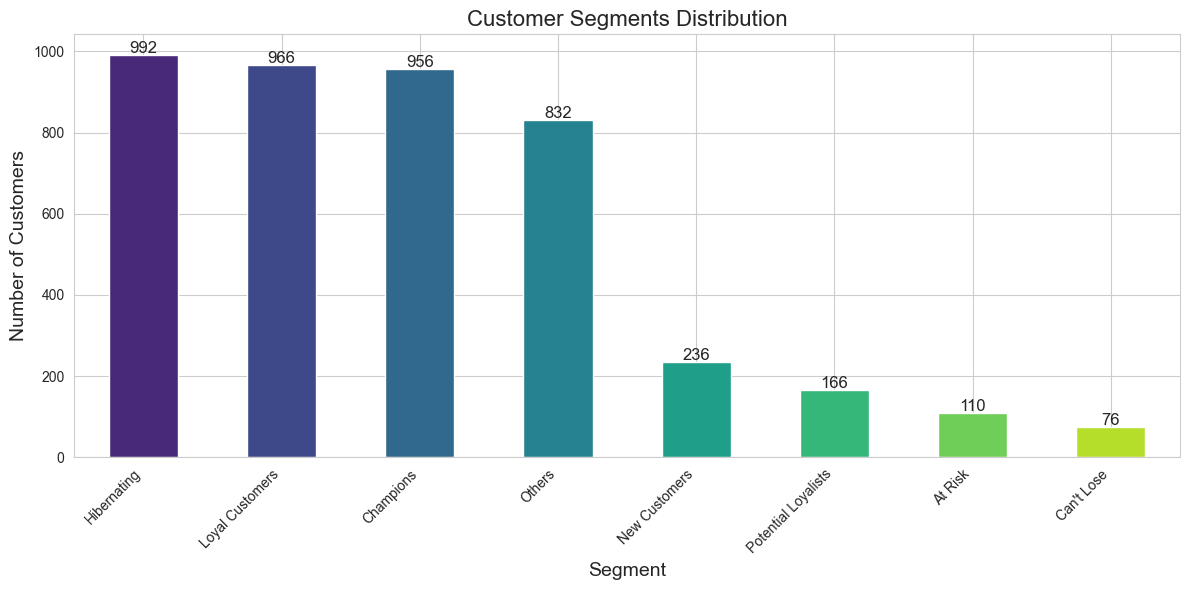

In [33]:
# 1. Customer Segments Distribution Bar Chart
plt.figure(figsize=(12, 6))
segment_counts = rfm_df_segmented['Segment'].value_counts()
ax = segment_counts.plot(kind='bar', color=sns.color_palette('viridis', len(segment_counts)))
plt.title('Customer Segments Distribution', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add count labels on top of bars
for i, v in enumerate(segment_counts):
    ax.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

The **Customer Segments Distribution** chart shows how customers are categorized based on their Recency, Frequency, and Monetary (RFM) scores. The largest group is **Hibernating customers (992)**, indicating many customers are inactive and need re-engagement. **Loyal Customers (966)** and **Champions (956)** form a strong base of valuable, frequent buyers. Meanwhile, **New Customers (236)** and **Potential Loyalists (166)** have the potential to become long-term buyers with the right strategies. The **At Risk (110)** and **Can’t Lose (76)** segments represent previously high-value customers who haven’t purchased recently, requiring targeted win-back efforts. Understanding this distribution helps in tailoring marketing strategies to retain valuable customers and re-engage inactive ones. 

Next, lets plot **Average Monetary Value by Recency and Frequency**

</div>

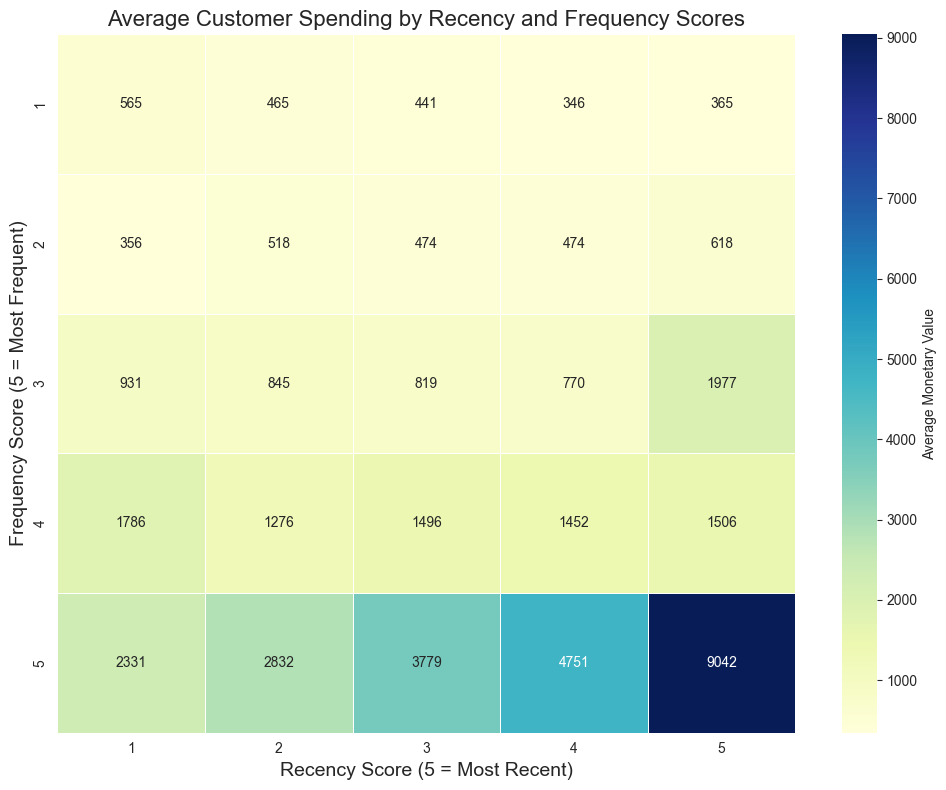

In [34]:
# 2. RFM Heatmap - Average Monetary Value by Recency and Frequency
# Create a pivot table with explicitly converted values
heatmap_data = pd.pivot_table(
    data=rfm_df,
    values='Monetary', 
    index=rfm_df['F_Score'].astype(int),  # Convert to int for proper pivoting 
    columns=rfm_df['R_Score'].astype(int),  # Convert to int for proper pivoting
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', 
            linewidths=0.5, cbar_kws={'label': 'Average Monetary Value'})
plt.title('Average Customer Spending by Recency and Frequency Scores', fontsize=16)
plt.xlabel('Recency Score (5 = Most Recent)', fontsize=14)
plt.ylabel('Frequency Score (5 = Most Frequent)', fontsize=14)
plt.tight_layout()
plt.show()

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

The **Average Customer Spending by Recency and Frequency Scores** heatmap illustrates the **average monetary value** of customers based on their **Recency (R)** and **Frequency (F)** scores. Recency measures how recently a customer made a purchase (higher is better), while Frequency represents how often they purchase (higher means more frequent buyers).

From the chart, a clear trend emerges: **customers who buy frequently and recently (R=5, F=5) spend the most on average (9,042)**. This confirms that engaged customers contribute the most revenue. Conversely, customers with **low recency and frequency (R=1, F=1) spend significantly less (565 on average)**, highlighting a segment that may need re-engagement strategies.

A notable observation is that **even customers with moderate frequency (F=3) can have occasional high spenders**, such as the **spike at R=5, F=3 (1,977)**. This suggests there may be a subset of valuable customers who buy less frequently but make large purchases.

In summary, the heatmap helps identify where revenue is concentrated and which customer segments could benefit from targeted retention or reactivation strategies.

</div>

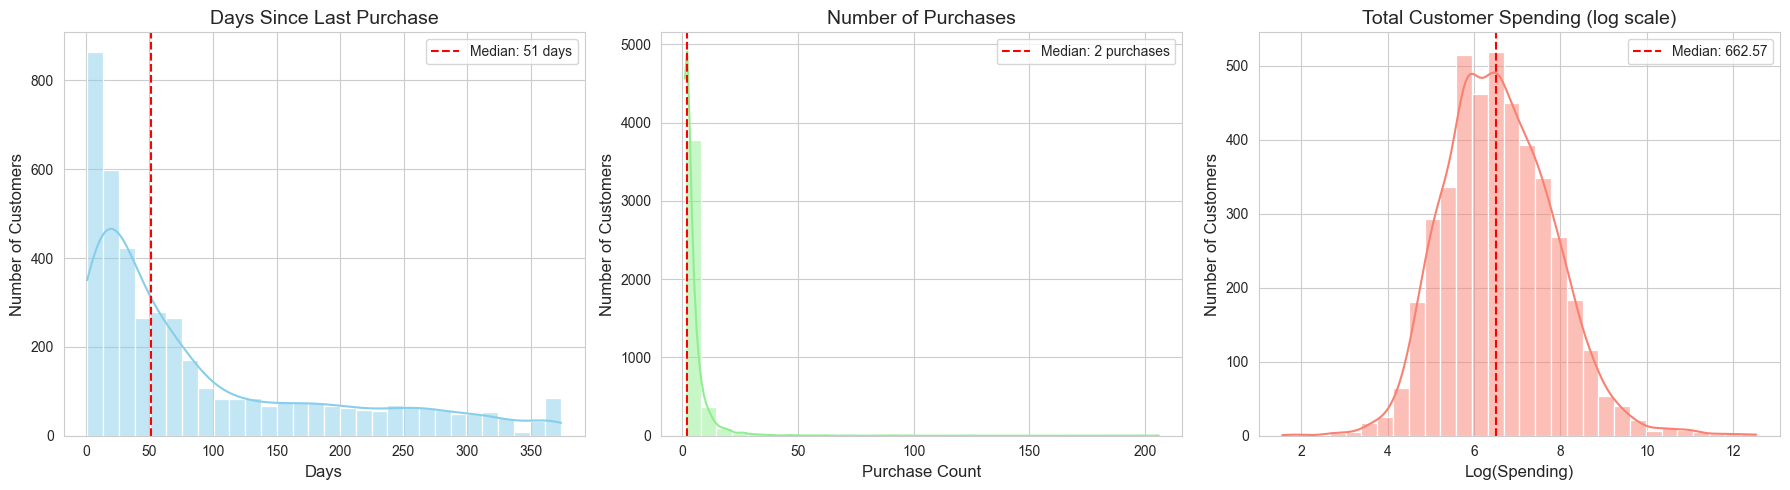

In [35]:
# 3. Distribution of RFM Metrics - Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency distribution
sns.histplot(rfm_df['Recency'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Days Since Last Purchase', fontsize=14)
axes[0].set_xlabel('Days', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].axvline(rfm_df['Recency'].median(), color='red', linestyle='--', 
                label=f'Median: {rfm_df["Recency"].median():.0f} days')
axes[0].legend()

# Frequency distribution
max_bins = min(30, rfm_df['Frequency'].max())
sns.histplot(rfm_df['Frequency'], bins=int(max_bins), kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Number of Purchases', fontsize=14)
axes[1].set_xlabel('Purchase Count', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].axvline(rfm_df['Frequency'].median(), color='red', linestyle='--', 
                label=f'Median: {rfm_df["Frequency"].median():.0f} purchases')
axes[1].legend()

# Monetary distribution (log scale for better visibility)
sns.histplot(np.log1p(rfm_df['Monetary']), bins=30, kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Total Customer Spending (log scale)', fontsize=14)
axes[2].set_xlabel('Log(Spending)', fontsize=12)
axes[2].set_ylabel('Number of Customers', fontsize=12)
log_median = np.log1p(rfm_df['Monetary'].median())
axes[2].axvline(log_median, color='red', linestyle='--', 
                label=f'Median: {rfm_df["Monetary"].median():.2f}')
axes[2].legend()

plt.tight_layout()
plt.show()

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Days Since Last Purchase chart** insights:
- **Most Customers Purchased Recently (0-50 Days):** The **blue curve (KDE)** peaks in the 0–50 days range, meaning that the majority of customers made their most recent purchase within the past 50 days. This suggests that recent purchases are more common, and there is a significant proportion of customers who are actively engaging with the business.
- After the peak at 0–50 days, the curve starts to decline, indicating that as time passes, fewer customers make new purchases. This indicates that customer activity drops off relatively quickly after a recent purchase, with fewer customers returning after 50–150 days.
- The **red vertical line** at X = 51 days marks the median, which is the point where half of your customers made their most recent purchase within 51 days, and the other half did so more than 51 days ago. This suggests that while most customers are recent buyers (as shown by the peak in the 0–50 days range), there is a substantial portion of customers who haven't engaged with the business in over 50 days.
- This chart shows **strong customer engagement in the short term**, but the **engagement quickly declines after this initial period.**
- Given the sharp drop-off after 50 days, it may be worth focusing on retention strategies for customers who haven’t purchased in over 50 days. **Re-engagement campaigns** targeting customers who are past this threshold could help increase overall activity.

**Number of Purchases chart** insights:
- **Median of 2 Purchases:** The median of 2 purchases tells us that half of the customers made 2 or fewer purchases.
- Most customers in the dataset make very few purchases, with the highest frequency observed in the 0–7 purchase range. 
- The distribution shows that customer engagement drastically decreases after the first few purchases. This highlights an opportunity for businesses to focus on customer retention strategies for those who have already made purchases.

**Total Customer Spending chart** insights:
- The chart shows that the majority of customers have a **moderate spending level**, with the most frequent spending values clustered around the **median** (662.57).
- The highest bar is at **X ≈ 6.5**, which corresponds to a log-transformed spending value of about 662.57 (the median). The **Y-axis** at this point reaches about **500 customers**, which represents the most common total spending range for your customers.
- The **parabolic shape** suggests that a small group of customers are spending very large amounts, but they represent a **small portion of the customer base.**

</div>

<div id="product_analysis" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-seri;">


#### 6. Product Analysis
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div id="top_products" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-seri;">


#### 6.1 Top Products
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Top products based on total number of orders:**

This sub-section finds the top products based on the total number of orders. By examining the total number of orders per product, we can identify which products are popular among customers.

</div>

In [36]:
top_products = complete_cleaned_orders.groupby('StockCode')['Quantity'].sum()
top_products = top_products.sort_values(ascending=False).head(10)

# Now, get the product descriptions by using the StockCode from the original DataFrame
top_products_with_description = complete_cleaned_orders[complete_cleaned_orders['StockCode'].isin(top_products.index)] \
    .drop_duplicates(subset='StockCode')[['StockCode', 'Description']]

top_products_with_description = top_products_with_description.set_index('StockCode').join(top_products)
top_products_with_description = top_products_with_description.reset_index()
top_products_with_description = top_products_with_description.sort_values(by='Quantity', ascending=False)
top_products_with_description

,StockCode,Description,Quantity
8,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,29839
6,22197,SMALL POPCORN HOLDER,23715
2,21212,PACK OF 72 RETROSPOT CAKE CASES,22870
0,84879,ASSORTED COLOUR BIRD ORNAMENT,18407
7,85099B,JUMBO BAG RED RETROSPOT,13933
9,84946,ANTIQUE SILVER TEA GLASS ETCHED,13609
3,21977,PACK OF 60 PINK PAISLEY CAKE CASES,13190
1,22492,MINI PAINT SET VINTAGE,12586
4,84991,60 TEATIME FAIRY CAKE CASES,12192
5,20668,DISCO BALL CHRISTMAS DECORATION,11754


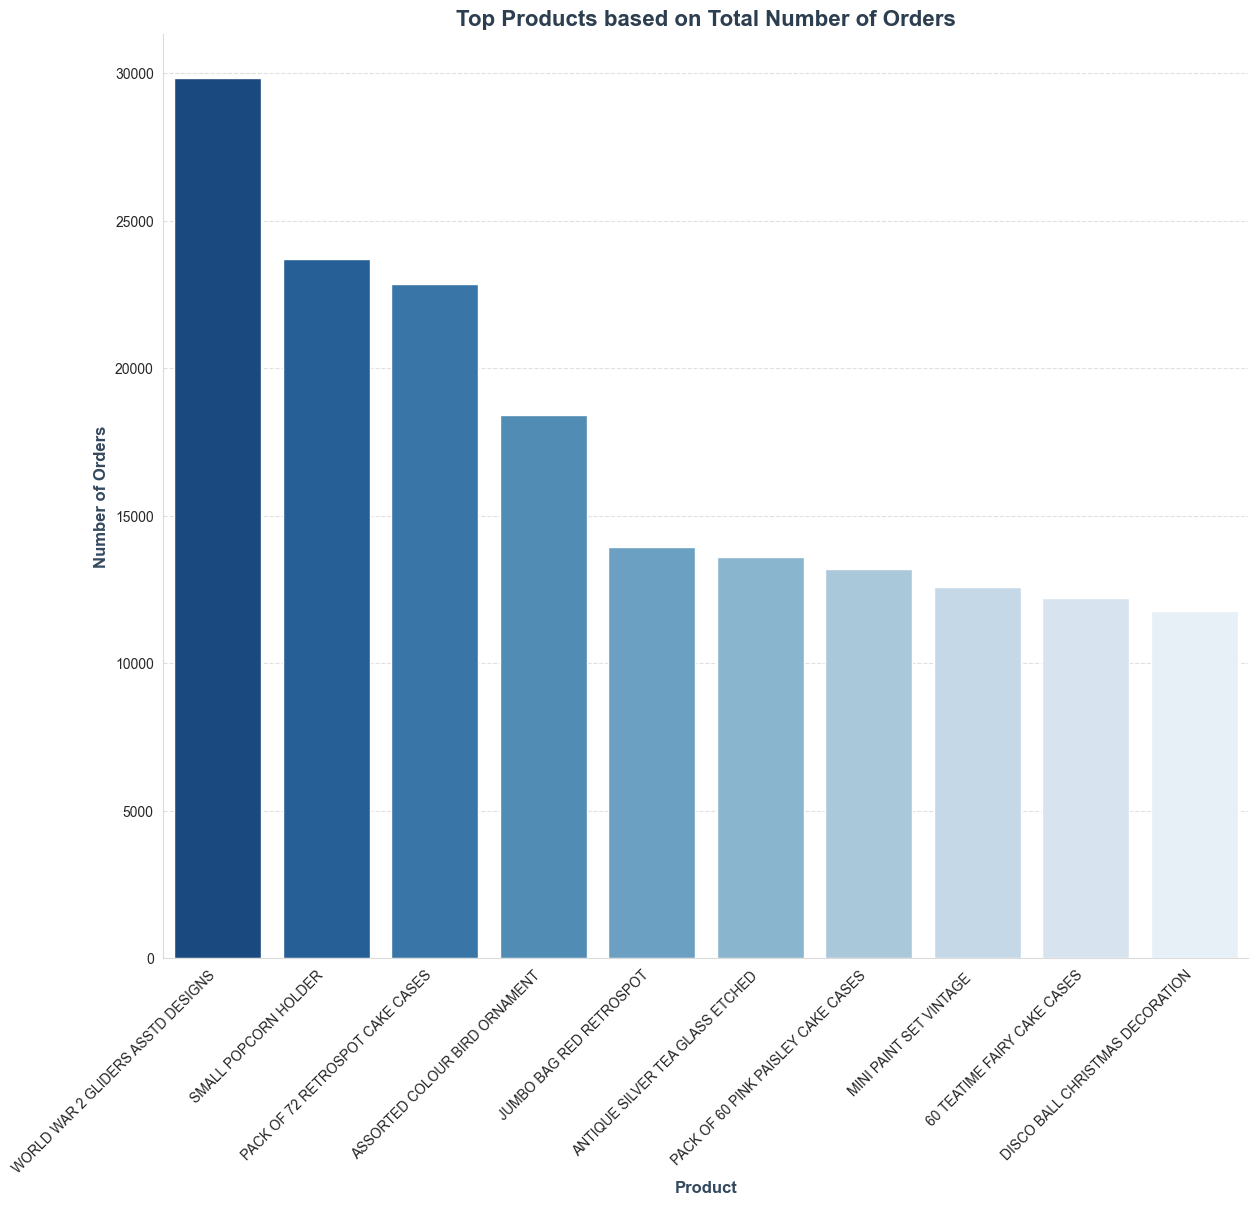

In [37]:
# Set Seaborn style for a professional look
sns.set_style("whitegrid")

# Create the figure and axes (2 rows, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(14, 12), dpi=100)

# Custom color palettes for a sleek look
color_palette_orders = sns.color_palette("Blues_r", len(top_products_with_description))

# --- Top Countries by Number of Orders ---
sns.barplot(
    ax=axes,
    x=top_products_with_description['Description'],
    y=top_products_with_description['Quantity'],
    hue=top_products_with_description['Description'],   # assign x as hue to remove the warning
    palette=color_palette_orders,
    dodge=False,                 # plot one bar per category
    legend=False
)
axes.set_title('Top Products based on Total Number of Orders', fontsize=16, fontweight='bold', color='#2C3E50')
axes.set_xlabel('Product', fontsize=12, fontweight='bold', color='#34495E')
axes.set_ylabel('Number of Orders', fontsize=12, fontweight='bold', color='#34495E')

# Rotate x-axis labels to make them readable, align properly, and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align to the right

axes.tick_params(axis='x', rotation=45, labelsize=10)
axes.grid(axis='y', linestyle='--', alpha=0.6)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_alpha(0.7)
axes.spines['bottom'].set_alpha(0.7)

plt.show()

<div id="revenue_drivers" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif">


#### 6.2 Revenue Drivers
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Revenue driver products:**

This sub-section identifies the top products that contribute most to the overall revenue. By examining the total revenue per product, we can pinpoint the items that are generating the most income for the business. These products, though possibly fewer in quantity, have a significant impact on the profitabilit.

</div>


In [38]:
revenue_driver_products = complete_cleaned_orders.groupby('StockCode')['TotalAmount'].sum()
revenue_driver_products = revenue_driver_products.sort_values(ascending=False).head(10)

# Now, get the product descriptions by using the StockCode from the original DataFrame
revenue_drivers_with_description = complete_cleaned_orders[complete_cleaned_orders['StockCode'].isin(revenue_driver_products.index)] \
    .drop_duplicates(subset='StockCode')[['StockCode', 'Description']]

revenue_drivers_with_description = revenue_drivers_with_description.set_index('StockCode').join(revenue_driver_products)
revenue_drivers_with_description = revenue_drivers_with_description.reset_index()
revenue_drivers_with_description = revenue_drivers_with_description.sort_values(by='TotalAmount', ascending=False)
revenue_drivers_with_description

,StockCode,Description,TotalAmount
6,22423,REGENCY CAKESTAND 3 TIER,40427.80
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,31837.51
1,84879,ASSORTED COLOUR BIRD ORNAMENT,31096.31
7,47566,PARTY BUNTING,29806.68
5,85099B,JUMBO BAG RED RETROSPOT,28460.70
8,23298,SPOTTY BUNTING,21277.95
9,23203,JUMBO BAG DOILEY PATTERNS,19839.94
2,22960,JAM MAKING SET WITH JARS,19682.24
4,22197,SMALL POPCORN HOLDER,18825.25
3,20725,LUNCH BAG RED RETROSPOT,18295.80


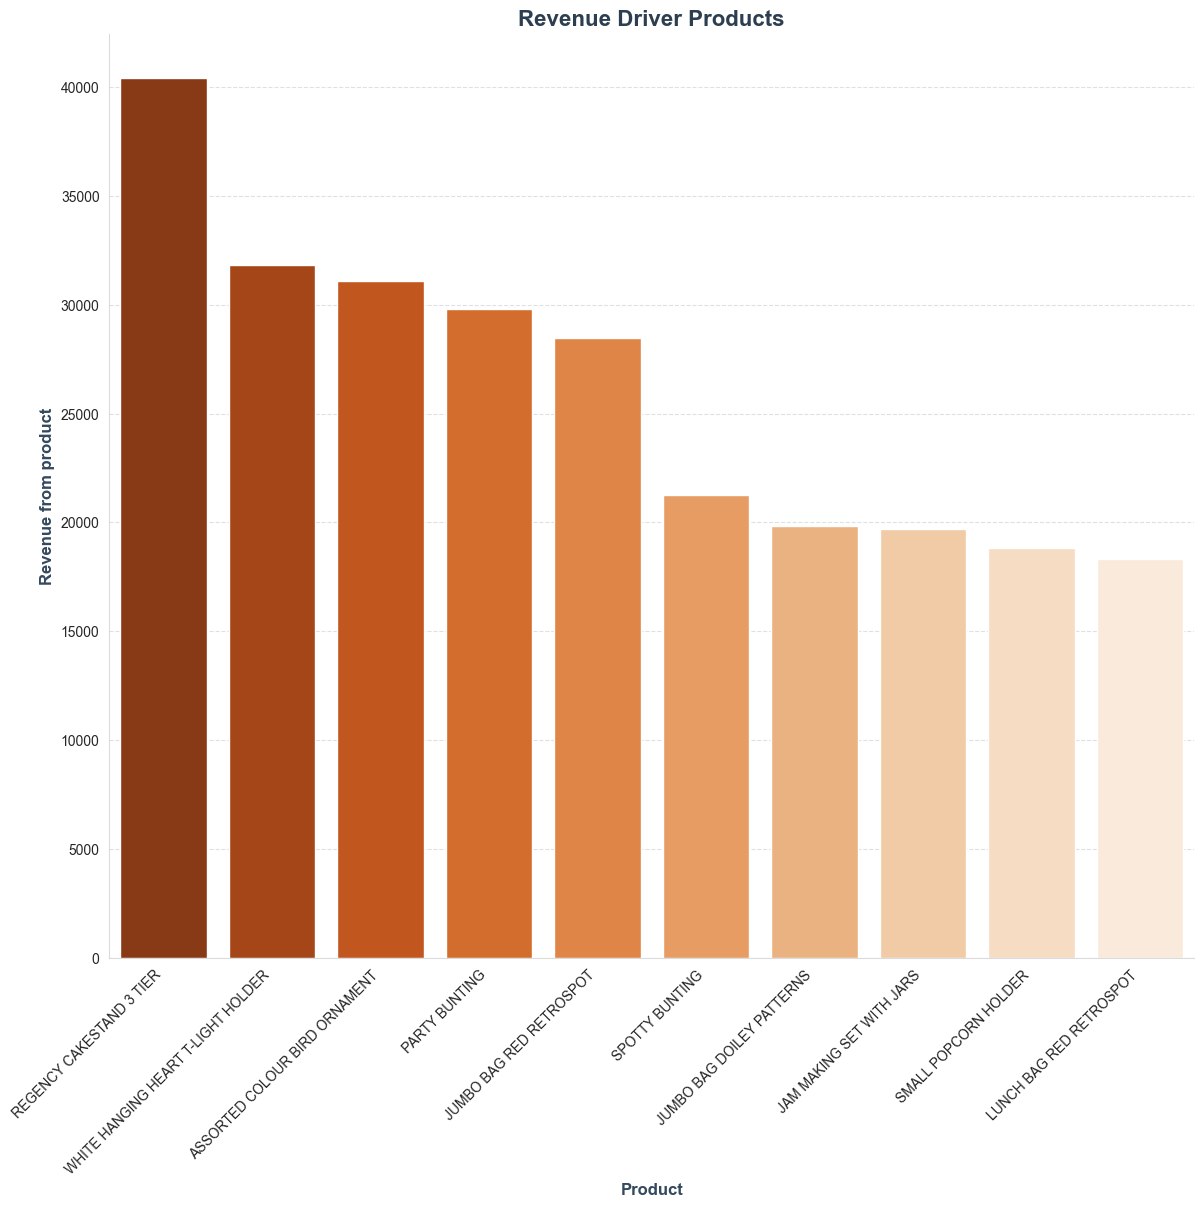

In [39]:
# Set Seaborn style for a professional look
sns.set_style("whitegrid")

# Create the figure and axes (2 rows, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(14, 12), dpi=100)

# Custom color palettes for a sleek look
color_palette_orders = sns.color_palette("Oranges_r", len(revenue_drivers_with_description))

# --- Top Countries by Number of Orders ---
sns.barplot(
    ax=axes,
    x=revenue_drivers_with_description['Description'],
    y=revenue_drivers_with_description['TotalAmount'],
    hue=revenue_drivers_with_description['Description'],   # assign x as hue to remove the warning
    palette=color_palette_orders,
    dodge=False,                 # plot one bar per category
    legend=False
)
axes.set_title('Revenue Driver Products', fontsize=16, fontweight='bold', color='#2C3E50')
axes.set_xlabel('Product', fontsize=12, fontweight='bold', color='#34495E')
axes.set_ylabel('Revenue from product', fontsize=12, fontweight='bold', color='#34495E')

# Rotate x-axis labels to make them readable, align properly, and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align to the right

axes.tick_params(axis='x', rotation=45, labelsize=10)
axes.grid(axis='y', linestyle='--', alpha=0.6)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_alpha(0.7)
axes.spines['bottom'].set_alpha(0.7)

plt.show()

<div id="return_prone_items" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 6.3 Return prone items
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Return-prone items:**

This sub-section identifies products that are more likely to be returned compared to others. For this analysis, canceled orders are used as a proxy for returns, as these orders typically represent customer dissatisfaction or issues such as incorrect items, quality concerns, or changes of mind. Outliers are removed from the analysis to ensure that extreme values (e.g., bulk orders) do not skew the results. By eliminating these outliers, we can focus on the typical customer behavior, which provides a more accurate representation of return-prone

To find return-prone items, we first identify the number of items each individual customer has returned for each product. This is done by counting the number of cancellations per product for each customer. Then, we sum these individual counts for each product to determine the total number of returns for each item. By sorting these totals in descending order, we can identify which products are most frequently returned, helping to highlight products that may be prone to returns. product.

</div>


In [40]:
# Find cancelled and non-outlier orders
cleaned_cancelled_orders = df[(df['Outlier'] == 0) & (df['InvoiceStatus'] == 'Cancelled')]

# Find the number of returns per product per customer
return_prone_items = cleaned_cancelled_orders.groupby(['StockCode', 'CustomerID']).size().reset_index(name='ReturnCount')

# Aggregate the number of returns for each product
return_prone_items = return_prone_items.groupby('StockCode')['ReturnCount'].sum().sort_values(ascending=False)

# Get the top 10 return-prone products
return_prone_items = return_prone_items.head(10)

# Get the descriptions for each return-prone product
return_prone_items_with_description = df[df['StockCode'].isin(return_prone_items.index)].drop_duplicates(subset='StockCode')[['StockCode', 'Description']]

# Join the descriptions with the return-prone products
return_prone_items_with_description = return_prone_items_with_description.set_index('StockCode').join(return_prone_items)
return_prone_items_with_description = return_prone_items_with_description.sort_values(by='ReturnCount', ascending=False)

return_prone_items_with_description

,Description,ReturnCount
StockCode,,
22960,JAM MAKING SET WITH JARS,53
21232,STRAWBERRY CERAMIC TRINKET BOX,49
22197,SMALL POPCORN HOLDER,42
22699,ROSES REGENCY TEACUP AND SAUCER,41
22720,SET OF 3 CAKE TINS PANTRY DESIGN,40
22697,GREEN REGENCY TEACUP AND SAUCER,33
22666,RECIPE BOX PANTRY YELLOW DESIGN,33
21314,SMALL GLASS HEART TRINKET POT,32
20725,LUNCH BAG RED RETROSPOT,30


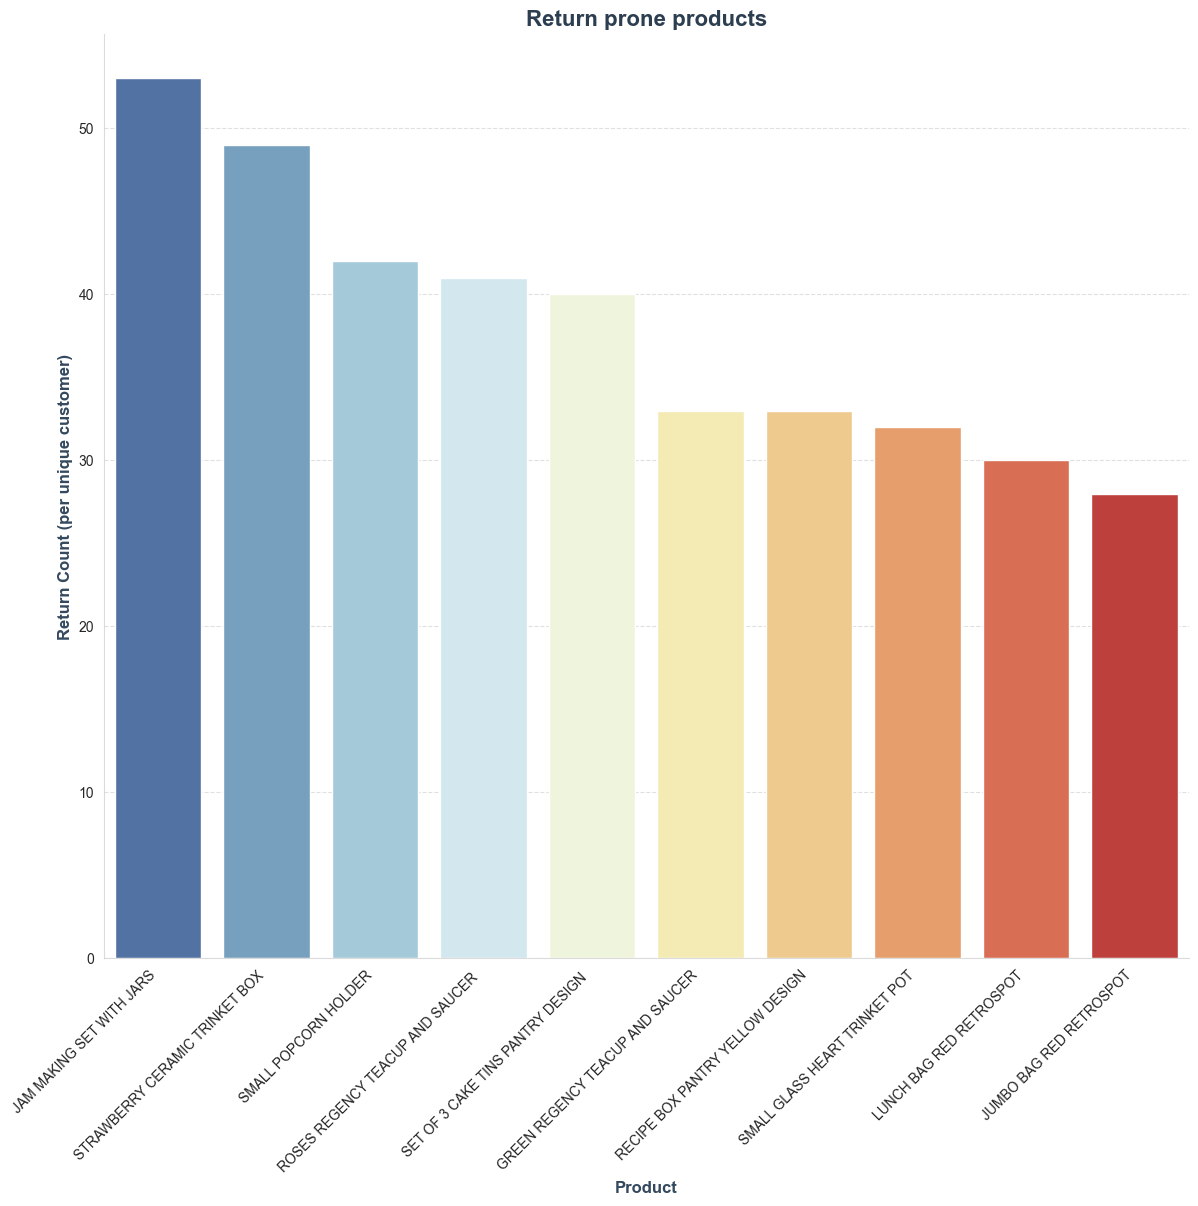

In [41]:
# Set Seaborn style for a professional look
sns.set_style("whitegrid")

# Create the figure and axes (2 rows, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(14, 12), dpi=100)

# Custom color palettes for a sleek look
color_palette_orders = sns.color_palette("RdYlBu_r", len(return_prone_items_with_description))

# --- Top Countries by Number of Orders ---
sns.barplot(
    ax=axes,
    x=return_prone_items_with_description['Description'],
    y=return_prone_items_with_description['ReturnCount'],
    hue=return_prone_items_with_description['Description'],   # assign x as hue to remove the warning
    palette=color_palette_orders,
    dodge=False,                 # plot one bar per category
    legend=False
)
axes.set_title('Return prone products', fontsize=16, fontweight='bold', color='#2C3E50')
axes.set_xlabel('Product', fontsize=12, fontweight='bold', color='#34495E')
axes.set_ylabel('Return Count (per unique customer)', fontsize=12, fontweight='bold', color='#34495E')

# Rotate x-axis labels to make them readable, align properly, and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align to the right

axes.tick_params(axis='x', rotation=45, labelsize=10)
axes.grid(axis='y', linestyle='--', alpha=0.6)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_alpha(0.7)
axes.spines['bottom'].set_alpha(0.7)

plt.show()

<div id="temporal_patterns" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif">


#### 7. Temporal patterns
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #FFFCDB; 
    border: 1px solid #E0C366; 
    border-radius: 10px; 
    padding: 12px; 
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    font-family: Arial, sans-serif;">

**Temporal Patterns:**

This section explores how customer behavior and sales performance change over time. By analyzing temporal patterns, we can uncover sales trends across different months, days of the week, and hours of the day. Identifying peak sales periods, seasonal spikes, and low-activity times helps businesses optimize inventory, staffing, and marketing strategies.

</div>


<div id="monthly_sales_trends" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 7.1 Monthly sales trends
<a href="#table_of_contents">⬆️ Table of Contents</a>

In this sub-section we will analyze **total sales sold per month** which will help to identify seasonality (e.g., spikes during holidays).

</div>

C:\Users\avazo\AppData\Local\Temp\ipykernel_5352\461933273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_orders.loc[:, 'InvoiceMonthName'] = complete_orders['InvoiceDate'].dt.month_name()


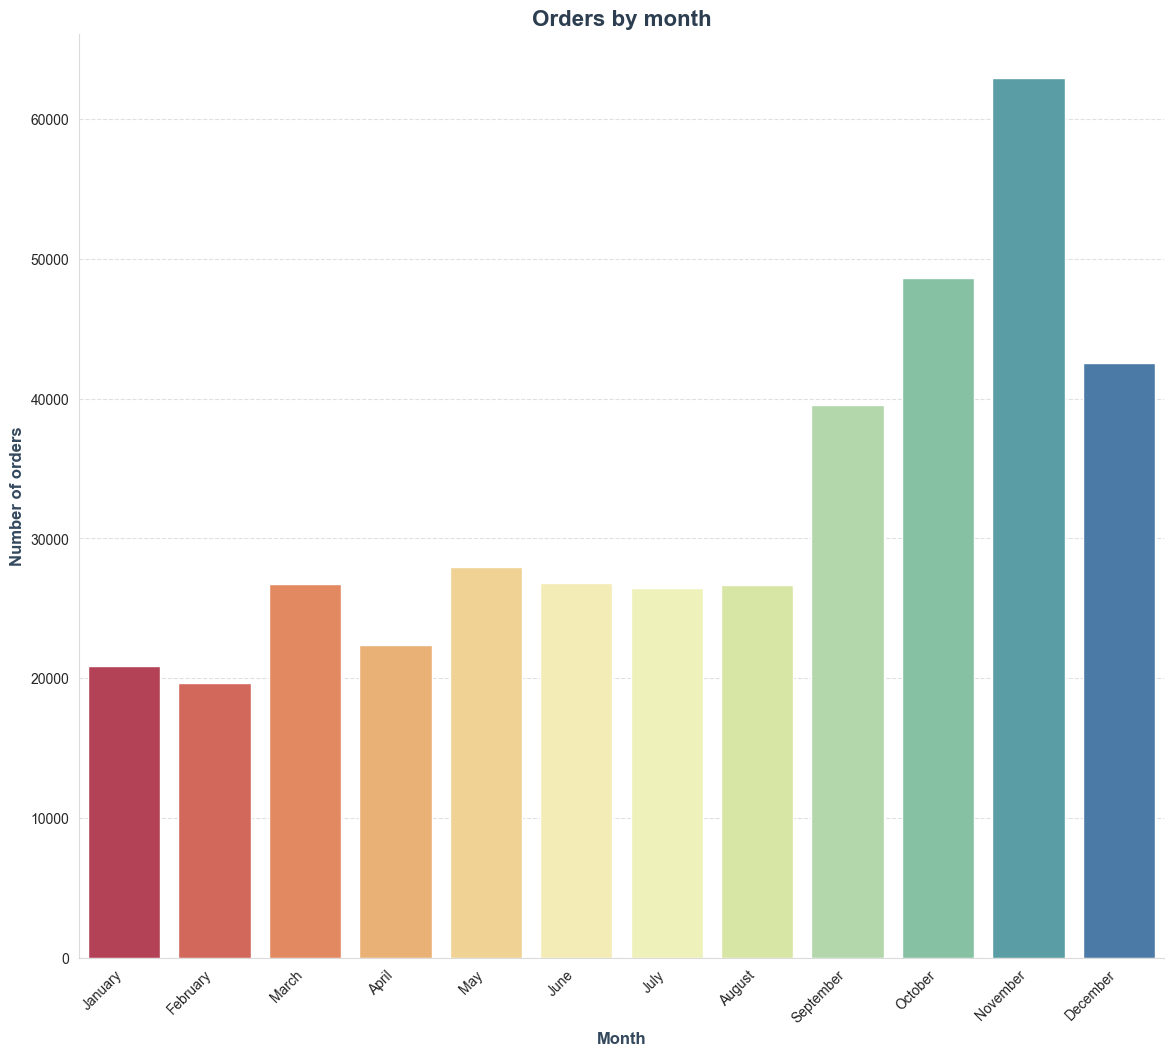

In [42]:
# For this analysis of orders we will use complete_orders dataframe because it does not contain cancelled orders
complete_orders.loc[:, 'InvoiceMonthName'] = complete_orders['InvoiceDate'].dt.month_name()
orders_by_month = complete_orders.groupby('InvoiceMonthName').size()

# Sort the result by month (Jan to Dec)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
orders_by_month = orders_by_month[month_order]

# Lets plot the result
# Set Seaborn style for a professional look
sns.set_style("whitegrid")

# Create the figure and axes (2 rows, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(14, 12), dpi=100)

# Custom color palettes for a sleek look
color_palette_orders = sns.color_palette("Spectral", len(orders_by_month))

# --- Top Countries by Number of Orders ---
sns.barplot(
    ax=axes,
    x=orders_by_month.index,
    y=orders_by_month.values,
    hue=orders_by_month.index,   # assign x as hue to remove the warning
    palette=color_palette_orders,
    dodge=False,                 # plot one bar per category
    legend=False
)
axes.set_title('Orders by month', fontsize=16, fontweight='bold', color='#2C3E50')
axes.set_xlabel('Month', fontsize=12, fontweight='bold', color='#34495E')
axes.set_ylabel('Number of orders', fontsize=12, fontweight='bold', color='#34495E')

# Rotate x-axis labels to make them readable, align properly, and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align to the right

axes.tick_params(axis='x', rotation=45, labelsize=10)
axes.grid(axis='y', linestyle='--', alpha=0.6)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_alpha(0.7)
axes.spines['bottom'].set_alpha(0.7)

plt.show()

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Inference from Orders by month chart:**

- **November** tops the list with 62,938 orders, followed by October (48,611) and December (42,533). This indicates a strong sales period at the end of the year, which might align with holiday shopping seasons.
- **January** and **February** are at the bottom, showing fewer orders. This could be due to the post-holiday season where customers tend to buy less.
- **Seasonality:** high orders towards the end of the year and a low orders at the beginning.

</div>

<div id="sales_by_day_of_week" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 7.2 Sales by Day of the Week
<a href="#table_of_contents">⬆️ Table of Contents</a>

In this sub-section we will analyze **total sales by day of the week** which will help to see which days generate the most revenue or orders.

</div>

C:\Users\avazo\AppData\Local\Temp\ipykernel_5352\2563942133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_orders.loc[:, 'InvoiceWeekDay'] = complete_orders['InvoiceDate'].dt.day_name()


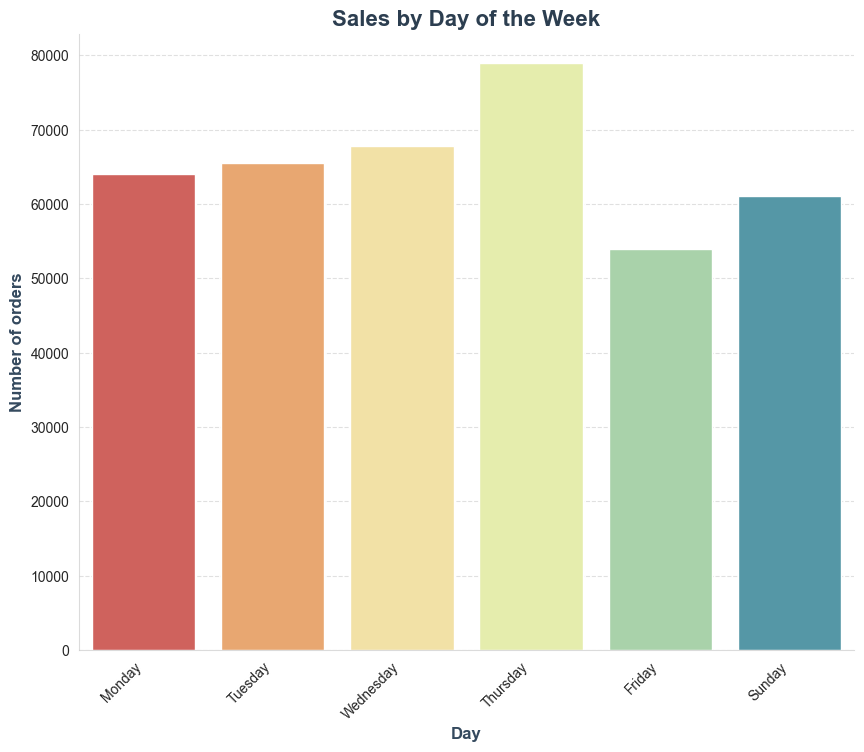

In [43]:
complete_orders.loc[:, 'InvoiceWeekDay'] = complete_orders['InvoiceDate'].dt.day_name()
orders_by_week_day = complete_orders.groupby('InvoiceWeekDay').size()

# Sort the result by month (Jan to Dec)
week_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
orders_by_week_day = orders_by_week_day[week_day_order]

# Lets plot the result
# Set Seaborn style for a professional look
sns.set_style("whitegrid")

# Create the figure and axes (2 rows, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(10, 8), dpi=100)

# Custom color palettes for a sleek look
color_palette_orders = sns.color_palette("Spectral", len(orders_by_week_day))

# --- Top Countries by Number of Orders ---
sns.barplot(
    ax=axes,
    x=orders_by_week_day.index,
    y=orders_by_week_day.values,
    hue=orders_by_week_day.index,   # assign x as hue to remove the warning
    palette=color_palette_orders,
    dodge=False,                 # plot one bar per category
    legend=False
)
axes.set_title('Sales by Day of the Week', fontsize=16, fontweight='bold', color='#2C3E50')
axes.set_xlabel('Day', fontsize=12, fontweight='bold', color='#34495E')
axes.set_ylabel('Number of orders', fontsize=12, fontweight='bold', color='#34495E')

# Rotate x-axis labels to make them readable, align properly, and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align to the right

axes.tick_params(axis='x', rotation=45, labelsize=10)
axes.grid(axis='y', linestyle='--', alpha=0.6)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_alpha(0.7)
axes.spines['bottom'].set_alpha(0.7)

plt.show()

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Inference from Sales by Day of the Week:**
- **Steady Demand Across the Week:** The business likely experiences steady demand because there is no drastic difference between the number of orders across different days of the week.
- **No data for Saturday**: The dataset does not contain any orders made on Saturday, which might suggest a data collection limitation or a restriction on sales during that day.


</div>

<div id="sales_by_hour_of_day" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 7.3 Sales by Hour of the Day
<a href="#table_of_contents">⬆️ Table of Contents</a>

In this sub-section we will analyze **total sales by hour of the day** which will help to track sales and customer behavior throughout the day to see if there are specific times when customers are more likely to buy.

</div>

C:\Users\avazo\AppData\Local\Temp\ipykernel_5352\2726862355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_orders.loc[:, 'InvoiceHour'] = complete_orders['InvoiceDate'].dt.hour


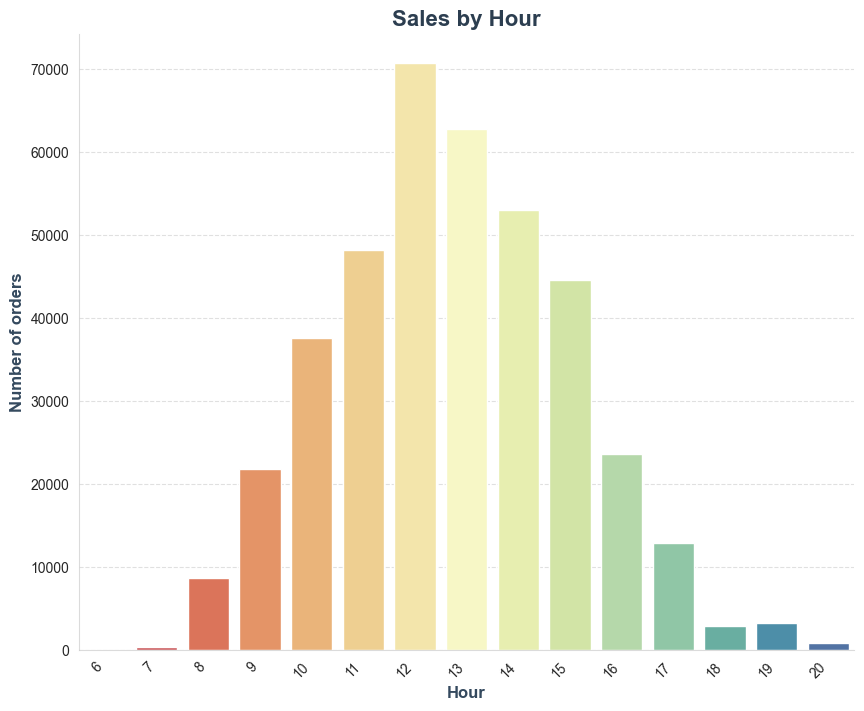

In [44]:
complete_orders.loc[:, 'InvoiceHour'] = complete_orders['InvoiceDate'].dt.hour
orders_by_hour = complete_orders.groupby('InvoiceHour').size()

# Lets plot the result
# Set Seaborn style for a professional look
sns.set_style("whitegrid")

# Create the figure and axes (2 rows, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(10, 8), dpi=100)

# Custom color palettes for a sleek look
color_palette_orders = sns.color_palette("Spectral", len(orders_by_hour))

# --- Top Countries by Number of Orders ---
sns.barplot(
    ax=axes,
    x=orders_by_hour.index,
    y=orders_by_hour.values,
    hue=orders_by_hour.index,   # assign x as hue to remove the warning
    palette=color_palette_orders,
    dodge=False,                 # plot one bar per category
    legend=False
)
axes.set_title('Sales by Hour', fontsize=16, fontweight='bold', color='#2C3E50')
axes.set_xlabel('Hour', fontsize=12, fontweight='bold', color='#34495E')
axes.set_ylabel('Number of orders', fontsize=12, fontweight='bold', color='#34495E')

# Rotate x-axis labels to make them readable, align properly, and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align to the right

axes.tick_params(axis='x', rotation=45, labelsize=10)
axes.grid(axis='y', linestyle='--', alpha=0.6)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_alpha(0.7)
axes.spines['bottom'].set_alpha(0.7)

plt.show()

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Inference:**
- The peak order times appear to be between **12:00 PM** and **3:00 PM**, where the order volume remains high, with **12:00 PM** (70,716 orders) being the highest, followed closely by **1:00 PM** (62,800 orders).
- No orders during **Early Hours / Late evenings**: There are no orders after **8:00 PM** and before **7:00 AM**

</div>

<div id="actionable_insights" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 8. Actionable Insights
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Actionable Insights for Business Growth:**
- **Enhance Retention for Recent Buyers:** Focus on re-engaging customers who haven’t purchased in the last 50 days. Target them with personalized offers to boost retention.
- **Target Key Markets:** Focus marketing efforts on the United Kingdom, where most orders and revenue come from. Explore opportunities in the Netherlands and Ireland.
- **Leverage Peak Seasons:** Plan promotions and inventory for November and December, when sales peak. Prepare early for the holiday shopping surge.
- **Address Return-Prone Products:** Investigate high-return products like the "Strawberry Ceramic Trinket Box" and improve product descriptions or quality to reduce returns.

</div>

<div id="product_recommendations" style="
    border-bottom: 1px solid #e0e0e0;
    padding-bottom: 8px;
    margin: 25px 0 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;">

#### 9. Product Recommendations
<a href="#table_of_contents">⬆️ Table of Contents</a>

</div>

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

In this section, we will build a **Product Recommendation System** to suggest relevant products to customers based on the purchase behavior of **similar users**.

The goal is to enhance the customer shopping experience by helping them discover items they have not purchased before but are likely to find interesting, based on patterns in other users' shopping behavior.

**What is a Product Recommendation System?**

A product recommendation system uses data about customer interactions—typically past purchases or preferences—to suggest products that a customer is likely to buy. These systems are widely used in e-commerce to personalize the shoppi similar users have.

**How It Will Be Built:**

We will use **Collaborative Filtering**, a technique that identifies patterns of user behavior. Specifically, we will implement **user-based filtering**, which works by:
- Finding customers with similar purchase histories.
- Using those similar customers' purchases to generate recommendations.

We will build a **user-item interaction matrix** and apply collaborative filtering using **scikit-learn** to find nearest neighbors vi cosine similarity.

</div>


<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

The first step in building the **Product Recommendation** system is to construct a **User-Item Interaction Matrix**. For this project, we will use a **Quantity-Based Matrix**, where each cell represents the total quantity of a specific product purchased by a customer.

This approach is ideal for our case because it captures not just whether a customer bought a product, but also how frequently they purchased it — a strong signal of interest and preference. It allows us to model customer behavior more accurately than a simple binary matrix, which treats all purchases equally regardless of quantity


</div>

In [84]:
# Use complete_cleander_orders that contains only complete and non-outlier rows
user_item_matrix = complete_cleaned_orders.pivot_table(index='CustomerID',
                                  columns='StockCode',
                                  values='Quantity',
                                  aggfunc='sum',
                                  fill_value=0)
user_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

Now that we have the **User-Item Interaction Matrix**, we can calculate the **cosine similarity** between customers to understand their purchase behavior similarity. **Cosine similarity is used here to measure the similarity between customers based on their product purchases. The higher the score, the more similar the customers' purchase behaviors are.

</div>

In [56]:
# Calculate the cosine similarity matrix between customers
cosine_sim = cosine_similarity(user_item_matrix)

# Create a DataFrame for better readability of cosine similarity scores
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

# Display the similarity matrix for the first 10 customers to check
cosine_sim_df.head(10)

CustomerID,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,12357.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,1.000000,0.116846,0.029246,0.020348,0.040939,0.000000,0.033088,0.016824,0.263091,0.028859,...,0.0,0.001709,0.235755,0.000000,0.021327,0.052478,0.000000,0.015324,0.095832,0.000000
12348.0,0.116846,1.000000,0.000000,0.000000,0.000000,0.000000,0.012502,0.000000,0.268602,0.000000,...,0.0,0.038220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149797,0.000000
12349.0,0.029246,0.000000,1.000000,0.029920,0.130814,0.000000,0.004931,0.000311,0.146613,0.115434,...,0.0,0.148074,0.000000,0.000000,0.015681,0.000000,0.000000,0.013398,0.066903,0.025697
12350.0,0.020348,0.000000,0.029920,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104418,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019865,0.000000
12352.0,0.040939,0.000000,0.130814,0.000000,1.000000,0.000000,0.044578,0.001729,0.052575,0.062312,...,0.0,0.026437,0.000000,0.000000,0.000000,0.000000,0.000000,0.002256,0.016345,0.014281
12353.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.010758,0.033298,0.060568,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12354.0,0.033088,0.012502,0.004931,0.000000,0.044578,0.000000,1.000000,0.000000,0.006693,0.064918,...,0.0,0.047387,0.000000,0.000000,0.000000,0.002707,0.000435,0.000000,0.105722,0.000000
12355.0,0.016824,0.000000,0.000311,0.000000,0.001729,0.010758,0.000000,1.000000,0.002985,0.039096,...,0.0,0.000935,0.298466,0.000000,0.000000,0.000000,0.000000,0.011326,0.088805,0.110507
12356.0,0.263091,0.268602,0.146613,0.000000,0.052575,0.033298,0.006693,0.002985,1.000000,0.067817,...,0.0,0.093198,0.000000,0.000000,0.000000,0.000000,0.000000,0.002337,0.052786,0.000000


<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

We’ll now define a function to find the most similar customers to a given target customer based on their purchase behaviors.
Then will define a function to recommend products to the target customer based on what similar customers have bought.

</div>

In [59]:
def get_similar_customers(customer_id, cosine_sim_df, top_n=5):
    # Get the most similar customers by sorting based on cosine similarity scores
    similar_scores = cosine_sim_df[customer_id].sort_values(ascending=False)
    
    # Exclude the customer itself from the recommendations
    similar_scores = similar_scores.drop(customer_id)
    
    # Get the top N most similar customers
    similar_customers = similar_scores.head(top_n)
    
    return similar_customers

def recommend_products(customer_id, cosine_sim_df, interaction_matrix, top_n=5):
    similar_customers = get_similar_customers(customer_id, cosine_sim_df, top_n)
    
    # Get the products purchased by similar customers
    similar_customers_purchases = interaction_matrix.loc[similar_customers.index]
    
    # Calculate the total quantity of products bought by similar customers
    similar_customers_total = similar_customers_purchases.sum(axis=0)
    
    # Exclude products that the target customer has already bought
    customer_purchases = interaction_matrix.loc[customer_id]
    recommendations = similar_customers_total[customer_purchases == 0].sort_values(ascending=False)
    
    # Get the top N recommended products
    recommended_products = recommendations.head(top_n)
    
    return recommended_products
    
recommended_products = recommend_products(12356, cosine_sim_df, user_item_matrix)
recommended_products

StockCode
21977    672
21975    360
23170    144
23171    144
23172    144
dtype: int64

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Preparing the Training and Testing Data**

To evaluate the performance of our recommendation system, we need to simulate how it would behave in a real-world scenario where it makes predictions based on past purchases.

We will split each customer's purchase history into a **training set** and a **testing set**:
- The **training set** contains the earlier transactions and is used to learn about customer behavior.
- The **testing set** contains the later transactions and is used to validate if the recommendations include products the customer actually bought later.

If a customer has fewer than 5 transactions, all of their data is assigned to the training set (as splitting wouldn't be meaningful).

This way, we can evaluate the model's ability to recommend products the customer hasn't seen yet but may be interested in.

</div>

In [116]:
train_data = []
test_data = []

for customer_id, customer_df in complete_cleaned_orders.groupby("CustomerID"):
    customer_df = customer_df.sort_values("InvoiceDate")  # chronological
    if len(customer_df) >= 5:
        split_point = int(len(customer_df) * 0.8)
        train_data.append(customer_df.iloc[:split_point])
        test_data.append(customer_df.iloc[split_point:])
    else:
        train_data.append(customer_df)  # all goes to train if too few

train_df = pd.concat(train_data)
test_df = pd.concat(test_data)

# Sanity check: Check if every CustomerID in test set is also in train set
assert set(test_df['CustomerID']).issubset(set(train_df['CustomerID']))

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Preparing the User-Item Matrix and Training the Recommendation Model**

In this step, we build the core of our recommendation engine:

- We first create a **user-item interaction matrix** from the training dataset using a pivot table. Each row corresponds to a customer, each column corresponds to a product (`StockCode`), and the cell values represent the quantity of that product purchased by the customer. If no purchase exists, the value is set to 0.
  
- Next, we ensure all `StockCode` values are treated as strings. This is important because some stock codes may be numeric and others alphanumeric, and mismatched types can cause issues during processing and comparison.

- Finally, we train a **K-Nearest Neighbors (KNN)** model using **cosine similarity** to identify customers with similar purchasing patterns. This model will later allow us to generate personalized product recommendations based on similar user behavior.

</div>

In [121]:
train_user_item_matrix = train_df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Ensure all column names (StockCode) are strings
train_user_item_matrix.columns = train_user_item_matrix.columns.astype(str)

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(train_user_item_matrix)

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Generating Personalized Product Recommendations**

In this step, we define a function to generate product recommendations for a given customer.

Here’s how the function works:

- If the customer is **not found in the training set** (i.e., a new or rarely seen user), we use a **cold-start strategy**: recommend the most popular items based on total quantity sold across all users.
  
- If the customer **exists in the training data**, we:
  - Retrieve the customer's purchase vector from the user-item matrix.
  - Use the trained KNN model to find **similar customers** based on cosine similarity.
  - Identify products that these similar users have bought, but which the target customer has **not yet purchased**.
  - Return a list of these new product suggestions as personalized recommendations.

This approach allows us to leverage patterns in the behavior of similar users to predict what a customer might be interested in, even if they haven’t bought those items before.

</div>

In [278]:
def get_recommendations(customer_id, num_recommendations=5):
    if customer_id not in train_user_item_matrix.index:
        # Cold start: Recommend top trending items
        popular_items = train_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).index
        return popular_items[:num_recommendations].tolist()

    # Get the customer’s vector (purchase quantities for all items)
    customer_vector = train_user_item_matrix.loc[customer_id].values.reshape(1, -1)
    
    # Find the nearest neighbors based on cosine similarity
    distances, indices = knn.kneighbors(customer_vector, n_neighbors=num_recommendations + 1)

    # Get items bought by similar users that this user hasn’t bought yet
    similar_users = train_user_item_matrix.iloc[indices[0][1:]]
    
    # Get items already bought by the customer
    customer_items = set(train_user_item_matrix.loc[customer_id][train_user_item_matrix.loc[customer_id] > 0].index)

    recommended_items = set()
    for i in range(similar_users.shape[0]):
        # For each similar user, get items they have bought
        similar_user_items = set(similar_users.iloc[i][similar_users.iloc[i] > 0].index)
        
        # Add items to recommendation list that the customer hasn't purchased yet
        recommended_items.update(similar_user_items - customer_items)

    # Return the top recommended items
    return list(recommended_items)[:num_recommendations]

<div style="
    background-color: #ffffff;
    border-left: 3px solid #6c757d;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: 'Segoe UI', Arial, sans-serif;
    line-height: 1.5;">

**Testing the Recommendation System**

To see our recommendation system in action, we select a **random customer** and generate a list of recommended products for them.

The output displays:
- The **Customer ID** selected
- A list of **recommended Stock Codes**, which represent products this customer is likely to be interested in, based on the behavior of similar users

This step provides a practical demonstration of the system’s ability to generate personalized suggestions. Although the recommendations might not match the customer’s past purchases exactly, they are inferred through collaborative patterns from similar users' shopping behavior.

</div>

In [279]:
# Select a random customer from the test set
random_customer_id = test_df['CustomerID'].sample(1).values[0]
print(f'Random customer: {random_customer_id}')

# Get recommendations for this customer
recommendations = get_recommendations(random_customer_id, num_recommendations=5)
print(f"Recommendations for Customer {random_customer_id}: {recommendations}")

Random customer: 14456.0


C:\Users\avazo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Recommendations for Customer 14456.0: ['84882', '21191', '84231', '23511', '21311']
